In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = os.getenv("CENSUS_API_KEY")
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')

In [5]:
# Could read in data directly after fetching in the first run and save as pickle below
census_occupation_gender_pd_2018 = pd.read_pickle("../Data/census_occupation_gender_pd_2018.pickle")
census_occupation_gender_pd_2017 = pd.read_pickle("../Data/census_occupation_gender_pd_2017.pickle")
census_occupation_gender_pd_2016 = pd.read_pickle("../Data/census_occupation_gender_pd_2016.pickle")
census_occupation_gender_pd_2015 = pd.read_pickle("../Data/census_occupation_gender_pd_2015.pickle")
census_occupation_gender_pd_2014 = pd.read_pickle("../Data/census_occupation_gender_pd_2014.pickle")
census_occupation_gender_pd_2013 = pd.read_pickle("../Data/census_occupation_gender_pd_2013.pickle")
census_occupation_gender_pd_2012 = pd.read_pickle("../Data/census_occupation_gender_pd_2012.pickle")
census_occupation_gender_pd_2011 = pd.read_pickle("../Data/census_occupation_gender_pd_2011.pickle")
census_occupation_gender_pd_2010 = pd.read_pickle("../Data/census_occupation_gender_pd_2010.pickle")

In [4]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2018 = c_2018.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2018 = pd.DataFrame(census_data_occupation_by_gender_2018)

# Column Reordering
census_occupation_gender_pd_2018 = census_occupation_gender_pd_2018.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2018 = census_occupation_gender_pd_2018[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2018.head()

State County                       Name  Employed_age16+_civilian  \
0    36    061  New York County, New York                  674929.0   
1    36    047     Kings County, New York                  882471.0   
2    36    081    Queens County, New York                  852111.0   
3    36    005     Bronx County, New York                  407073.0   
4    36    085  Richmond County, New York                  162368.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       354977.0                  13378.0                   17561.0   
1       459919.0                   3503.0                   14397.0   
2       476331.0                   3902.0                   11448.0   
3       220306.0                   1075.0                    1818.0   
4        90216.0                   1886.0                    2229.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                     22645.0                       6286.0        25158.0   
1                     11139.0                       6925.0        26595.0   
2                     11494.0                       6810.0        16820.0   
3                      2336.0                        956.0         5124.0   
4                      3342.0                       1986.0         4083.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                 3479.0                  2287.0   
1  ...                 1833.0                  3085.0   
2  ...                 1862.0                  1021.0   
3  ...                  180.0                   229.0   
4  ...                  388.0                   269.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     788.0                  102490.0               155369.0   
1                     898.0                   81791.0                95951.0   
2                     253.0                   70033.0                75417.0   
3                      42.0                   48870.0                56600.0   
4                      51.0                   66497.0                90633.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      75746.0         None                None                  None   
1      55517.0         None                None                  None   
2      53848.0         None                None                  None   
3      44457.0         None                None                  None   
4      56397.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [6]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#census_occupation_gender_pd_2018.to_csv("census_occupation_gender_pd_2018.csv", encoding="utf-8", index=False)

In [7]:
#census_occupation_gender_pd_2018.to_pickle("census_occupation_gender_pd_2018.pickle")

In [8]:
#census_occupation_gender_pd_t2018 = census_occupation_gender_pd_2018.T
#census_occupation_gender_pd_t2018.head()

0                       1  \
State                                            36                      36   
County                                          061                     047   
Name                      New York County, New York  Kings County, New York   
Employed_age16+_civilian                     674929                  882471   
Employed_male                                354977                  459919   

                                                2                       3  \
State                                          36                      36   
County                                        081                     005   
Name                      Queens County, New York  Bronx County, New York   
Employed_age16+_civilian                   852111                  407073   
Employed_male                              476331                  220306   

                                                  4  
State                                            36  
County                                          085  
Name                      Richmond County, New York  
Employed_age16+_civilian                     162368  
Employed_male                                 90216

In [9]:
#census_occupation_gender_pd_t2018.to_csv("census_occupation_gender_pd_t2018.csv", encoding="utf-8", index=False)

In [10]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2017 = c_2017.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2017 = pd.DataFrame(census_data_occupation_by_gender_2017)

# Column Reordering
census_occupation_gender_pd_2017 = census_occupation_gender_pd_2017.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male Business Operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male Data Scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female Business Operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female Data Scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2017 = census_occupation_gender_pd_2017[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male Business Operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male Data Scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female Business Operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female Data Scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2017.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  418442.0   
1    36    047     Kings County, New York                  892721.0   
2    36    061  New York County, New York                  680034.0   
3    36    081    Queens County, New York                  865134.0   
4    36    085  Richmond County, New York                  165503.0   

   Employed_male  Financial_managers_male  Male Business Operations  \
0       220820.0                   1222.0                    3087.0   
1       465883.0                   4861.0                   10673.0   
2       368539.0                  12842.0                   13591.0   
3       492556.0                   3285.0                    9739.0   
4        94401.0                   1157.0                    2064.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2950.0                       2124.0         3142.0   
1                     11608.0                       6516.0        24118.0   
2                     28096.0                       9372.0        19746.0   
3                     14777.0                       9616.0        21811.0   
4                      3274.0                       1512.0         4150.0   

   ...  Female Data Scientits  Software_devops_female  \
0  ...                  128.0                   256.0   
1  ...                 1862.0                  3866.0   
2  ...                 2817.0                  1592.0   
3  ...                  493.0                  1731.0   
4  ...                   79.0                   442.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      52.0                   56132.0                51252.0   
1                     472.0                   76848.0                83993.0   
2                     280.0                   81778.0               152116.0   
3                     189.0                   66725.0                71971.0   
4                       0.0                   81082.0                86126.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      42358.0         None                None                  None   
1      50661.0         None                None                  None   
2      67826.0         None                None                  None   
3      51587.0         None                None                  None   
4      61064.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#census_occupation_gender_pd_2017.to_csv("census_occupation_gender_pd_2017.csv", encoding="utf-8", index=False)

In [12]:
#census_occupation_gender_pd_2017.to_pickle("census_occupation_gender_pd_2017.pickle")

In [13]:
#census_occupation_gender_pd_t2017 = census_occupation_gender_pd_2017.T
#census_occupation_gender_pd_t2017.head()

0                       1  \
State                                         36                      36   
County                                       005                     047   
Name                      Bronx County, New York  Kings County, New York   
Employed_age16+_civilian                  418442                  892721   
Employed_male                             220820                  465883   

                                                  2                        3  \
State                                            36                       36   
County                                          061                      081   
Name                      New York County, New York  Queens County, New York   
Employed_age16+_civilian                     680034                   865134   
Employed_male                                368539                   492556   

                                                  4  
State                                            36  
County                                          085  
Name                      Richmond County, New York  
Employed_age16+_civilian                     165503  
Employed_male                                 94401

In [14]:
#census_occupation_gender_pd_t2017.to_csv("census_occupation_gender_pd_t2017.csv", encoding="utf-8", index=False)

In [15]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2016 = c_2016.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2016 = pd.DataFrame(census_data_occupation_by_gender_2016)

# Column Reordering
census_occupation_gender_pd_2016 = census_occupation_gender_pd_2016.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2016 = census_occupation_gender_pd_2016[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2016.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  419838.0   
1    36    047     Kings County, New York                  866784.0   
2    36    061  New York County, New York                  670593.0   
3    36    081    Queens County, New York                  844355.0   
4    36    085  Richmond County, New York                  159593.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       227816.0                    772.0                    1826.0   
1       459620.0                   5957.0                    9828.0   
2       360551.0                  13715.0                   13495.0   
3       478943.0                   3827.0                    7392.0   
4        90593.0                    774.0                    1378.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      3171.0                       1985.0         3734.0   
1                     11162.0                       5343.0        22582.0   
2                     23648.0                       6506.0        21402.0   
3                     12805.0                       7799.0        18655.0   
4                      3704.0                       1950.0         3548.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  228.0                   306.0   
1  ...                 2182.0                  2856.0   
2  ...                 3163.0                  1465.0   
3  ...                 1791.0                  2150.0   
4  ...                   93.0                   355.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     179.0                   47345.0                56403.0   
1                     697.0                   66775.0                81141.0   
2                     968.0                  101820.0               151280.0   
3                     287.0                   61940.0                68988.0   
4                       0.0                   84643.0                76780.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      36455.0         None                None                  None   
1      50558.0         None                None                  None   
2      61718.0         None                None                  None   
3      46962.0         None                None                  None   
4      60699.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [16]:
#census_occupation_gender_pd_2016.to_csv("census_occupation_gender_pd_2016.csv", encoding="utf-8", index=False)

In [17]:
#census_occupation_gender_pd_2016.to_pickle("census_occupation_gender_pd_2016.pickle")

In [18]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2015 = c_2015.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2015 = pd.DataFrame(census_data_occupation_by_gender_2015)

# Column Reordering
census_occupation_gender_pd_2015 = census_occupation_gender_pd_2015.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2015 = census_occupation_gender_pd_2015[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2015.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  412292.0   
1    36    047     Kings County, New York                  866632.0   
2    36    061  New York County, New York                  664093.0   
3    36    081    Queens County, New York                  839195.0   
4    36    085  Richmond County, New York                  155243.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       221150.0                    323.0                    2188.0   
1       459862.0                   5339.0                   11819.0   
2       354913.0                  14337.0                   16888.0   
3       475530.0                   4283.0                    8735.0   
4        86214.0                   1070.0                    1582.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2852.0                       1856.0         5192.0   
1                     10096.0                       6447.0        19653.0   
2                     22486.0                       7331.0        21368.0   
3                     13864.0                       8852.0        16614.0   
4                      2924.0                       1308.0         3445.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  146.0                   370.0   
1  ...                  856.0                  3114.0   
2  ...                 1951.0                  2480.0   
3  ...                 1108.0                  2016.0   
4  ...                  105.0                   330.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     187.0                   49735.0                58408.0   
1                     486.0                   70623.0                82153.0   
2                     258.0                   91561.0               152425.0   
3                     252.0                   61312.0                70638.0   
4                      36.0                   47398.0                80242.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      40829.0         None                None                  None   
1      50572.0         None                None                  None   
2      70052.0         None                None                  None   
3      45906.0         None                None                  None   
4      49748.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [19]:
#census_occupation_gender_pd_2015.to_csv("census_occupation_gender_pd_2015.csv", encoding="utf-8", index=False)

In [20]:
#census_occupation_gender_pd_2015.to_pickle("census_occupation_gender_pd_2015.pickle")

In [21]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2014 = c_2014.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2014 = pd.DataFrame(census_data_occupation_by_gender_2014)

# Column Reordering
census_occupation_gender_pd_2014 = census_occupation_gender_pd_2014.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2014 = census_occupation_gender_pd_2014[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2014.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  402762.0   
1    36    047     Kings County, New York                  843131.0   
2    36    061  New York County, New York                  652237.0   
3    36    081    Queens County, New York                  814682.0   
4    36    085  Richmond County, New York                  151049.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       217560.0                   1430.0                    2364.0   
1       449260.0                   4587.0                   10343.0   
2       345271.0                  11858.0                   14888.0   
3       461253.0                   3777.0                    5620.0   
4        83439.0                    841.0                    1407.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      3252.0                       1847.0         2592.0   
1                     11821.0                       6995.0        18794.0   
2                     21701.0                       6228.0        16973.0   
3                     11948.0                       8018.0        16605.0   
4                      3114.0                       1894.0         2721.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  418.0                   198.0   
1  ...                 1152.0                  2549.0   
2  ...                 1961.0                  2584.0   
3  ...                 1605.0                  1709.0   
4  ...                   32.0                   633.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      40.0                   51712.0                54105.0   
1                     330.0                   66690.0                76623.0   
2                     356.0                   81318.0               140848.0   
3                     329.0                   58177.0                66506.0   
4                     122.0                   65244.0                75817.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      36967.0         None                None                  None   
1      46028.0         None                None                  None   
2      55872.0         None                None                  None   
3      46267.0         None                None                  None   
4      51686.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [22]:
#census_occupation_gender_pd_2014.to_csv("census_occupation_gender_pd_2014.csv", encoding="utf-8", index=False)

In [23]:
#census_occupation_gender_pd_2014.to_pickle("census_occupation_gender_pd_2014.pickle")

In [24]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2013 = c_2013.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2013 = pd.DataFrame(census_data_occupation_by_gender_2013)

# Column Reordering
census_occupation_gender_pd_2013 = census_occupation_gender_pd_2013.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2013 = census_occupation_gender_pd_2013[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2013.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  383329.0   
1    36    047     Kings County, New York                  824027.0   
2    36    061  New York County, New York                  637580.0   
3    36    081    Queens County, New York                  807808.0   
4    36    085  Richmond County, New York                  159861.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       201847.0                    460.0                    2937.0   
1       436115.0                   3085.0                    9672.0   
2       332696.0                  11067.0                   14755.0   
3       458071.0                   4047.0                    5985.0   
4        91404.0                   1180.0                    2127.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      1974.0                       1540.0         3241.0   
1                     10765.0                       7219.0        17825.0   
2                     23033.0                      11903.0        16732.0   
3                     12428.0                       7609.0        16445.0   
4                      3765.0                       2299.0         2924.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  327.0                     0.0   
1  ...                 1345.0                  2744.0   
2  ...                 1942.0                  3490.0   
3  ...                 1539.0                  2436.0   
4  ...                  372.0                   660.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                     112.0                   47418.0                51529.0   
1                     478.0                   64921.0                71447.0   
2                     678.0                  100581.0               135143.0   
3                     328.0                   61067.0                66168.0   
4                       0.0                   64988.0                85963.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      40117.0         None                None                  None   
1      43710.0         None                None                  None   
2      56643.0         None                None                  None   
3      42583.0         None                None                  None   
4      51220.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [25]:
#census_occupation_gender_pd_2013.to_csv("census_occupation_gender_pd_2013.csv", encoding="utf-8", index=False)

In [26]:
#census_occupation_gender_pd_2013.to_pickle("census_occupation_gender_pd_2013.pickle")

In [27]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2012 = c_2012.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2012 = pd.DataFrame(census_data_occupation_by_gender_2012)

# Column Reordering
census_occupation_gender_pd_2012 = census_occupation_gender_pd_2012.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2012 = census_occupation_gender_pd_2012[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2012.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  381145.0   
1    36    047     Kings County, New York                  811493.0   
2    36    061  New York County, New York                  642187.0   
3    36    081    Queens County, New York                  794231.0   
4    36    085  Richmond County, New York                  154812.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       201891.0                    453.0                    2489.0   
1       429221.0                   3948.0                    7477.0   
2       337832.0                   9972.0                   12812.0   
3       452499.0                   4661.0                    6155.0   
4        88871.0                    887.0                    1809.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2559.0                       1698.0         3285.0   
1                     10900.0                       7106.0        15452.0   
2                     25304.0                      12736.0        14542.0   
3                     12352.0                       8722.0        14532.0   
4                      2745.0                       1815.0         3051.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  349.0                   313.0   
1  ...                  935.0                  2676.0   
2  ...                 2155.0                  2491.0   
3  ...                 1929.0                  1310.0   
4  ...                  325.0                   746.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      61.0                   47232.0                46263.0   
1                     637.0                   61247.0                67130.0   
2                     384.0                   81182.0               121952.0   
3                     259.0                   62493.0                61281.0   
4                      82.0                   71715.0                72199.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      37168.0         None                None                  None   
1      42290.0         None                None                  None   
2      60391.0         None                None                  None   
3      45761.0         None                None                  None   
4      50825.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [28]:
#census_occupation_gender_pd_2012.to_csv("census_occupation_gender_pd_2012.csv", encoding="utf-8", index=False)

In [29]:
#census_occupation_gender_pd_2012.to_pickle("census_occupation_gender_pd_2012.pickle")

In [30]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2011 = c_2011.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2011 = pd.DataFrame(census_data_occupation_by_gender_2011)

# Column Reordering
census_occupation_gender_pd_2011 = census_occupation_gender_pd_2011.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2011 = census_occupation_gender_pd_2011[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2011.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  375393.0   
1    36    047     Kings County, New York                  785394.0   
2    36    061  New York County, New York                  605158.0   
3    36    081    Queens County, New York                  769707.0   
4    36    085  Richmond County, New York                  156402.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       196145.0                   1037.0                    1655.0   
1       410424.0                   3758.0                    6513.0   
2       320621.0                  10848.0                   14441.0   
3       439634.0                   4310.0                    8442.0   
4        89000.0                    907.0                    1219.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      3036.0                       1989.0         3083.0   
1                     12407.0                       7540.0        17076.0   
2                     26440.0                       9369.0        10377.0   
3                     12283.0                       9346.0        17178.0   
4                      3572.0                       2475.0         3287.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  191.0                   182.0   
1  ...                 1101.0                  2526.0   
2  ...                 1497.0                  1650.0   
3  ...                  566.0                  2046.0   
4  ...                   75.0                   596.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                      44.0                   51105.0                47753.0   
1                     201.0                   58461.0                66901.0   
2                     669.0                   71553.0               133754.0   
3                     866.0                   60613.0                58618.0   
4                       0.0                   71498.0                65113.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      41363.0         None                None                  None   
1      39610.0         None                None                  None   
2      52790.0         None                None                  None   
3      45048.0         None                None                  None   
4      56311.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [31]:
#census_occupation_gender_pd_2011.to_csv("census_occupation_gender_pd_2011.csv", encoding="utf-8", index=False)

In [32]:
#census_occupation_gender_pd_2011.to_pickle("census_occupation_gender_pd_2011.pickle")

In [33]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data_occupation_by_gender_2010 = c_2010.acs1.get((
                                      "NAME", 
                                      "B24020_001E", 
                                      "B24020_002E",
                                      "B24020_008E",
                                      "B24020_015E",
                                      "B24020_016E",
                                      "B24020_017E",
                                      "B24020_021E",
                                      "B24020_022E",
                                      "B24020_023E",
                                      "B24020_024E",
    
                                      "B24020_153E",
                                      "B24020_159E",
                                      "B24020_163E",
                                      "B24020_167E",
                                      "B24020_168E",
                                      "B24020_172E",
                                      "B24020_173E",
                                      "B24020_174E",
                                      "B24020_175E",
    
                                      "B24041_012E",
                                      "B24041_014E",
                                      "B24041_015E",
    
    
                                      "B24123_052E",
                                      "B24123_056E",
                                      "B24123_067E",
                                      "B24123_068E",
                                      
                         ), 
                         
                         {'for': 'county:061,005,047,081,085', 'in':'state:36'})

# Convert to DataFrame
census_occupation_gender_pd_2010 = pd.DataFrame(census_data_occupation_by_gender_2010)

# Column Reordering
census_occupation_gender_pd_2010 = census_occupation_gender_pd_2010.rename(columns={#"B01003_001E": "Population",
                                      
                                      "B24020_001E": "Employed_age16+_civilian",
                                      "B24020_002E": "Employed_male",
                                      "B24020_008E": "Financial_managers_male",
                                      "B24020_015E": "Male_business_operations",
                                      "B24020_016E": "Financial_specialists_male",
                                      "B24020_017E": "Accountants_&_auditors_male",
                                      "B24020_021E": "Computer_male",
                                      "B24020_022E": "Male_data_scientits",
                                      "B24020_023E": "Software_devops_male",
                                      "B24020_024E": "Database_&_system_male",
    
                                      "B24020_153E": "Employed_female",
                                      "B24020_159E": "Financial_managers_female",
                                      "B24020_163E": "Female_business_operations",
                                      "B24020_167E": "Financial_specialists_female",
                                      "B24020_168E": "Accountants_&_auditors_female",
                                      "B24020_172E": "Computer_female",
                                      "B24020_173E" : "Female_data_scientits",
                                      "B24020_174E": "Software_devops_female",
                                      "B24020_175E": "Database_&_system_female",
    
                                      "B24041_012E": "Information_age16+_total",
                                      "B24041_014E": "Finance_and_insurance",
                                      "B24041_015E": "Real_estate",

                                      "B24123_052E": "Accountants",
                                      "B24123_056E": "Financial_analysts",
                                      "B24123_067E": "Computer_programmers",
                                      "B24123_068E": "Software_developers",
                                      
    
                                      
                                      "NAME": "Name", "state": "State", "county":"County"})



# Final DataFrame
census_occupation_gender_pd_2010 = census_occupation_gender_pd_2010[["State", "County", "Name", 
                        
                                      "Employed_age16+_civilian",
                                      "Employed_male",
                                      "Financial_managers_male",
                                      "Male_business_operations",
                                      "Financial_specialists_male",
                                      "Accountants_&_auditors_male",
                                      "Computer_male",
                                      "Male_data_scientits",
                                      "Software_devops_male",
                                      "Database_&_system_male",
    
                                      "Employed_female",
                                      "Financial_managers_female",
                                      "Female_business_operations",
                                      "Financial_specialists_female",
                                      "Accountants_&_auditors_female",
                                      "Computer_female",
                                      "Female_data_scientits",
                                      "Software_devops_female",
                                      "Database_&_system_female",
    
                                      "Information_age16+_total",
                                      "Finance_and_insurance",
                                      "Real_estate",

                                      "Accountants",
                                      "Financial_analysts",
                                      "Computer_programmers",
                                      "Software_developers",
                                                                     
                                                                     
                                                                     
                      ]]

census_occupation_gender_pd_2010.head()

State County                       Name  Employed_age16+_civilian  \
0    36    005     Bronx County, New York                  382642.0   
1    36    047     Kings County, New York                  793298.0   
2    36    061  New York County, New York                  604865.0   
3    36    081    Queens County, New York                  763128.0   
4    36    085  Richmond County, New York                  151120.0   

   Employed_male  Financial_managers_male  Male_business_operations  \
0       198289.0                    626.0                    1910.0   
1       417076.0                   4226.0                    4825.0   
2       319625.0                   7920.0                   13961.0   
3       431109.0                   4915.0                    6359.0   
4        87562.0                   1358.0                    1532.0   

   Financial_specialists_male  Accountants_&_auditors_male  Computer_male  \
0                      2922.0                       1528.0         3464.0   
1                     10578.0                       7706.0        14991.0   
2                     22505.0                      10295.0        14842.0   
3                     12474.0                       8278.0        12782.0   
4                      2906.0                       2064.0         3628.0   

   ...  Female_data_scientits  Software_devops_female  \
0  ...                  356.0                   362.0   
1  ...                  733.0                  2111.0   
2  ...                 2044.0                  1090.0   
3  ...                  810.0                  1310.0   
4  ...                  134.0                   765.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                       0.0                   49090.0                45770.0   
1                     585.0                   56023.0                60058.0   
2                     352.0                   82014.0               125112.0   
3                     199.0                   52500.0                61474.0   
4                      80.0                   65619.0                66770.0   

   Real_estate  Accountants  Financial_analysts  Computer_programmers  \
0      39340.0         None                None                  None   
1      41348.0         None                None                  None   
2      42421.0         None                None                  None   
3      42878.0         None                None                  None   
4      70510.0         None                None                  None   

   Software_developers  
0                 None  
1                 None  
2                 None  
3                 None  
4                 None  

[5 rows x 29 columns]

In [34]:
#census_occupation_gender_pd_2010.to_pickle("census_occupation_gender_pd_2010.pickle")

In [35]:
#census_occupation_gender_pd_2010.to_csv("census_occupation_gender_pd_2010.csv", encoding="utf-8", index=False)

## Financial Specialists

In [72]:
employed_df_2018 = pd.DataFrame()

employed_df_2018['Year']= [2018, 2018, 2018, 2018, 2018]
employed_df_2018['Name']=census_occupation_gender_pd_2018['Name']
employed_df_2018['County']=census_occupation_gender_pd_2018['County']
employed_df_2018['Financial_specialists_male']=census_occupation_gender_pd_2018['Financial_specialists_male']
employed_df_2018['Financial_specialists_female']=census_occupation_gender_pd_2018['Financial_specialists_female']

employed_df_2018.head()

Year                       Name County  Financial_specialists_male  \
0  2018  New York County, New York    061                     22645.0   
1  2018     Kings County, New York    047                     11139.0   
2  2018    Queens County, New York    081                     11494.0   
3  2018     Bronx County, New York    005                      2336.0   
4  2018  Richmond County, New York    085                      3342.0   

   Financial_specialists_female  
0                       10456.0  
1                       13903.0  
2                       13281.0  
3                        3640.0  
4                        3495.0

In [73]:
employed_df_2018.set_index(['County','Year', 'Name'], inplace=True)
employed_df_2018

Financial_specialists_male  \
County Year Name                                                    
061    2018 New York County, New York                     22645.0   
047    2018 Kings County, New York                        11139.0   
081    2018 Queens County, New York                       11494.0   
005    2018 Bronx County, New York                         2336.0   
085    2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2018 New York County, New York                       10456.0  
047    2018 Kings County, New York                          13903.0  
081    2018 Queens County, New York                         13281.0  
005    2018 Bronx County, New York                           3640.0  
085    2018 Richmond County, New York                        3495.0

In [74]:
employed_df_2017 = pd.DataFrame()

employed_df_2017['Year']= [2017, 2017, 2017, 2017, 2017]
employed_df_2017['Name']=census_occupation_gender_pd_2017['Name']
employed_df_2017['County']=census_occupation_gender_pd_2017['County']
employed_df_2017['Financial_specialists_male']=census_occupation_gender_pd_2017['Financial_specialists_male'] #index starts from 0
employed_df_2017['Financial_specialists_female']=census_occupation_gender_pd_2017['Financial_specialists_female']

employed_df_2017

Year                       Name County  Financial_specialists_male  \
0  2017     Bronx County, New York    005                      2950.0   
1  2017     Kings County, New York    047                     11608.0   
2  2017  New York County, New York    061                     28096.0   
3  2017    Queens County, New York    081                     14777.0   
4  2017  Richmond County, New York    085                      3274.0   

   Financial_specialists_female  
0                        3983.0  
1                       11816.0  
2                       10637.0  
3                       13611.0  
4                        2378.0

In [75]:
employed_df_2017.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2017

Financial_specialists_male  \
County Year Name                                                    
005    2017 Bronx County, New York                         2950.0   
047    2017 Kings County, New York                        11608.0   
061    2017 New York County, New York                     28096.0   
081    2017 Queens County, New York                       14777.0   
085    2017 Richmond County, New York                      3274.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2017 Bronx County, New York                           3983.0  
047    2017 Kings County, New York                          11816.0  
061    2017 New York County, New York                       10637.0  
081    2017 Queens County, New York                         13611.0  
085    2017 Richmond County, New York                        2378.0

In [76]:
employed_df_2016 = pd.DataFrame()

employed_df_2016['Year']= [2016, 2016, 2016, 2016, 2016]
employed_df_2016['Name']=census_occupation_gender_pd_2016['Name']
employed_df_2016['County']=census_occupation_gender_pd_2016['County']
employed_df_2016['Financial_specialists_male']=census_occupation_gender_pd_2016['Financial_specialists_male']
employed_df_2016['Financial_specialists_female']=census_occupation_gender_pd_2016['Financial_specialists_female']

employed_df_2016.head()

Year                       Name County  Financial_specialists_male  \
0  2016     Bronx County, New York    005                      3171.0   
1  2016     Kings County, New York    047                     11162.0   
2  2016  New York County, New York    061                     23648.0   
3  2016    Queens County, New York    081                     12805.0   
4  2016  Richmond County, New York    085                      3704.0   

   Financial_specialists_female  
0                        4453.0  
1                       10285.0  
2                       13293.0  
3                       13697.0  
4                        1802.0

In [77]:
employed_df_2016.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2016

Financial_specialists_male  \
County Year Name                                                    
005    2016 Bronx County, New York                         3171.0   
047    2016 Kings County, New York                        11162.0   
061    2016 New York County, New York                     23648.0   
081    2016 Queens County, New York                       12805.0   
085    2016 Richmond County, New York                      3704.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2016 Bronx County, New York                           4453.0  
047    2016 Kings County, New York                          10285.0  
061    2016 New York County, New York                       13293.0  
081    2016 Queens County, New York                         13697.0  
085    2016 Richmond County, New York                        1802.0

In [78]:
employed_df_2015 = pd.DataFrame()

employed_df_2015['Year']= [2015, 2015, 2015, 2015, 2015]
employed_df_2015['Name']=census_occupation_gender_pd_2015['Name']
employed_df_2015['County']=census_occupation_gender_pd_2015['County']
employed_df_2015['Financial_specialists_male']=census_occupation_gender_pd_2015['Financial_specialists_male']
employed_df_2015['Financial_specialists_female']=census_occupation_gender_pd_2015['Financial_specialists_female']

employed_df_2015.head()

Year                       Name County  Financial_specialists_male  \
0  2015     Bronx County, New York    005                      2852.0   
1  2015     Kings County, New York    047                     10096.0   
2  2015  New York County, New York    061                     22486.0   
3  2015    Queens County, New York    081                     13864.0   
4  2015  Richmond County, New York    085                      2924.0   

   Financial_specialists_female  
0                        3929.0  
1                       11658.0  
2                       11651.0  
3                       14109.0  
4                        2988.0

In [79]:
employed_df_2015.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2015

Financial_specialists_male  \
County Year Name                                                    
005    2015 Bronx County, New York                         2852.0   
047    2015 Kings County, New York                        10096.0   
061    2015 New York County, New York                     22486.0   
081    2015 Queens County, New York                       13864.0   
085    2015 Richmond County, New York                      2924.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2015 Bronx County, New York                           3929.0  
047    2015 Kings County, New York                          11658.0  
061    2015 New York County, New York                       11651.0  
081    2015 Queens County, New York                         14109.0  
085    2015 Richmond County, New York                        2988.0

In [80]:
employed_df_2014 = pd.DataFrame()

employed_df_2014['Year']= [2014, 2014, 2014, 2014, 2014]
employed_df_2014['Name']=census_occupation_gender_pd_2014['Name']
employed_df_2014['County']=census_occupation_gender_pd_2014['County']
employed_df_2014['Financial_specialists_male']=census_occupation_gender_pd_2014['Financial_specialists_male']
employed_df_2014['Financial_specialists_female']=census_occupation_gender_pd_2014['Financial_specialists_female']

employed_df_2014.head()

Year                       Name County  Financial_specialists_male  \
0  2014     Bronx County, New York    005                      3252.0   
1  2014     Kings County, New York    047                     11821.0   
2  2014  New York County, New York    061                     21701.0   
3  2014    Queens County, New York    081                     11948.0   
4  2014  Richmond County, New York    085                      3114.0   

   Financial_specialists_female  
0                        3024.0  
1                        8698.0  
2                       14898.0  
3                       13265.0  
4                        1606.0

In [81]:
employed_df_2014.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2014

Financial_specialists_male  \
County Year Name                                                    
005    2014 Bronx County, New York                         3252.0   
047    2014 Kings County, New York                        11821.0   
061    2014 New York County, New York                     21701.0   
081    2014 Queens County, New York                       11948.0   
085    2014 Richmond County, New York                      3114.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2014 Bronx County, New York                           3024.0  
047    2014 Kings County, New York                           8698.0  
061    2014 New York County, New York                       14898.0  
081    2014 Queens County, New York                         13265.0  
085    2014 Richmond County, New York                        1606.0

In [82]:
employed_df_2013 = pd.DataFrame()

employed_df_2013['Year']= [2013, 2013, 2013, 2013, 2013]
employed_df_2013['Name']=census_occupation_gender_pd_2013['Name']
employed_df_2013['County']=census_occupation_gender_pd_2013['County']
employed_df_2013['Financial_specialists_male']=census_occupation_gender_pd_2013['Financial_specialists_male']
employed_df_2013['Financial_specialists_female']=census_occupation_gender_pd_2013['Financial_specialists_female']

employed_df_2013.head()

Year                       Name County  Financial_specialists_male  \
0  2013     Bronx County, New York    005                      1974.0   
1  2013     Kings County, New York    047                     10765.0   
2  2013  New York County, New York    061                     23033.0   
3  2013    Queens County, New York    081                     12428.0   
4  2013  Richmond County, New York    085                      3765.0   

   Financial_specialists_female  
0                        4596.0  
1                       11266.0  
2                       13645.0  
3                       14374.0  
4                        2190.0

In [83]:
employed_df_2013.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2013

Financial_specialists_male  \
County Year Name                                                    
005    2013 Bronx County, New York                         1974.0   
047    2013 Kings County, New York                        10765.0   
061    2013 New York County, New York                     23033.0   
081    2013 Queens County, New York                       12428.0   
085    2013 Richmond County, New York                      3765.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2013 Bronx County, New York                           4596.0  
047    2013 Kings County, New York                          11266.0  
061    2013 New York County, New York                       13645.0  
081    2013 Queens County, New York                         14374.0  
085    2013 Richmond County, New York                        2190.0

In [84]:
employed_df_2012 = pd.DataFrame()

employed_df_2012['Year']= [2012, 2012, 2012, 2012, 2012]
employed_df_2012['Name']=census_occupation_gender_pd_2012['Name']
employed_df_2012['County']=census_occupation_gender_pd_2012['County']
employed_df_2012['Financial_specialists_male']=census_occupation_gender_pd_2012['Financial_specialists_male']
employed_df_2012['Financial_specialists_female']=census_occupation_gender_pd_2012['Financial_specialists_female']

employed_df_2012.head()

Year                       Name County  Financial_specialists_male  \
0  2012     Bronx County, New York    005                      2559.0   
1  2012     Kings County, New York    047                     10900.0   
2  2012  New York County, New York    061                     25304.0   
3  2012    Queens County, New York    081                     12352.0   
4  2012  Richmond County, New York    085                      2745.0   

   Financial_specialists_female  
0                        4782.0  
1                       11310.0  
2                       13628.0  
3                       12281.0  
4                        2989.0

In [85]:
employed_df_2012.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2012

Financial_specialists_male  \
County Year Name                                                    
005    2012 Bronx County, New York                         2559.0   
047    2012 Kings County, New York                        10900.0   
061    2012 New York County, New York                     25304.0   
081    2012 Queens County, New York                       12352.0   
085    2012 Richmond County, New York                      2745.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2012 Bronx County, New York                           4782.0  
047    2012 Kings County, New York                          11310.0  
061    2012 New York County, New York                       13628.0  
081    2012 Queens County, New York                         12281.0  
085    2012 Richmond County, New York                        2989.0

In [86]:
employed_df_2011 = pd.DataFrame()

employed_df_2011['Year']= [2011, 2011, 2011, 2011, 2011]
employed_df_2011['Name']=census_occupation_gender_pd_2011['Name']
employed_df_2011['County']=census_occupation_gender_pd_2011['County']
employed_df_2011['Financial_specialists_male']=census_occupation_gender_pd_2011['Financial_specialists_male']
employed_df_2011['Financial_specialists_female']=census_occupation_gender_pd_2011['Financial_specialists_female']

employed_df_2011.head()

Year                       Name County  Financial_specialists_male  \
0  2011     Bronx County, New York    005                      3036.0   
1  2011     Kings County, New York    047                     12407.0   
2  2011  New York County, New York    061                     26440.0   
3  2011    Queens County, New York    081                     12283.0   
4  2011  Richmond County, New York    085                      3572.0   

   Financial_specialists_female  
0                        4054.0  
1                        9384.0  
2                       13585.0  
3                       12396.0  
4                        1964.0

In [87]:
employed_df_2011.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2011

Financial_specialists_male  \
County Year Name                                                    
005    2011 Bronx County, New York                         3036.0   
047    2011 Kings County, New York                        12407.0   
061    2011 New York County, New York                     26440.0   
081    2011 Queens County, New York                       12283.0   
085    2011 Richmond County, New York                      3572.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2011 Bronx County, New York                           4054.0  
047    2011 Kings County, New York                           9384.0  
061    2011 New York County, New York                       13585.0  
081    2011 Queens County, New York                         12396.0  
085    2011 Richmond County, New York                        1964.0

In [88]:
employed_df_2010 = pd.DataFrame()

employed_df_2010['Year']= [2010, 2010, 2010, 2010, 2010]
employed_df_2010['Name']=census_occupation_gender_pd_2010['Name']
employed_df_2010['County']=census_occupation_gender_pd_2010['County']
employed_df_2010['Financial_specialists_male']=census_occupation_gender_pd_2010['Financial_specialists_male']
employed_df_2010['Financial_specialists_female']=census_occupation_gender_pd_2010['Financial_specialists_female']

employed_df_2010.head()

Year                       Name County  Financial_specialists_male  \
0  2010     Bronx County, New York    005                      2922.0   
1  2010     Kings County, New York    047                     10578.0   
2  2010  New York County, New York    061                     22505.0   
3  2010    Queens County, New York    081                     12474.0   
4  2010  Richmond County, New York    085                      2906.0   

   Financial_specialists_female  
0                        4344.0  
1                       10787.0  
2                       13964.0  
3                       13008.0  
4                        1931.0

In [89]:
employed_df_2010.set_index(['County', 'Year', 'Name'], inplace=True)
employed_df_2010

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
047    2010 Kings County, New York                        10578.0   
061    2010 New York County, New York                     22505.0   
081    2010 Queens County, New York                       12474.0   
085    2010 Richmond County, New York                      2906.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
047    2010 Kings County, New York                          10787.0  
061    2010 New York County, New York                       13964.0  
081    2010 Queens County, New York                         13008.0  
085    2010 Richmond County, New York                        1931.0

In [90]:
#employed_df_2018 = employed_df_2018.set_index.County #now index set to 'County'

#option 1
#keep index of t
#employed_df_2018.index = employed_df_2017.index 

#option 2
#index of employed_df_2017 starts from 0
#employed_df_2017.reset_index(drop=True, inplace=True)

#now concat will keep number of rows 
financial_specialists = pd.concat(
                                    [employed_df_2010, employed_df_2011, employed_df_2012, employed_df_2013, 
                                     employed_df_2014, employed_df_2015, employed_df_2016, employed_df_2017, employed_df_2018], 
                                     join='inner', axis="rows").sort_index() # join rows
financial_specialists

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
       2011 Bronx County, New York                         3036.0   
       2012 Bronx County, New York                         2559.0   
       2013 Bronx County, New York                         1974.0   
       2014 Bronx County, New York                         3252.0   
       2015 Bronx County, New York                         2852.0   
       2016 Bronx County, New York                         3171.0   
       2017 Bronx County, New York                         2950.0   
       2018 Bronx County, New York                         2336.0   
047    2010 Kings County, New York                        10578.0   
       2011 Kings County, New York                        12407.0   
       2012 Kings County, New York                        10900.0   
       2013 Kings County, New York                        10765.0   
       2014 Kings County, New York                        11821.0   
       2015 Kings County, New York                        10096.0   
       2016 Kings County, New York                        11162.0   
       2017 Kings County, New York                        11608.0   
       2018 Kings County, New York                        11139.0   
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   
081    2010 Queens County, New York                       12474.0   
       2011 Queens County, New York                       12283.0   
       2012 Queens County, New York                       12352.0   
       2013 Queens County, New York                       12428.0   
       2014 Queens County, New York                       11948.0   
       2015 Queens County, New York                       13864.0   
       2016 Queens County, New York                       12805.0   
       2017 Queens County, New York                       14777.0   
       2018 Queens County, New York                       11494.0   
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
       2011 Bronx County, New York                           4054.0  
       2012 Bronx County, New York                           4782.0  
       2013 Bronx County, New York                           4596.0  
       2014 Bronx County, New York                           3024.0  
       2015 Bronx County, New York                           3929.0  
       2016 Bronx County, New York                           4453.0  
       2017 Bronx County, New York                           3983.0  
       2018 Bronx County, New York                           3640.0  
047    2010 Kings County,

In [91]:
financial_specialists_Bronx = financial_specialists.loc[['005']]
financial_specialists_Bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [92]:
financial_specialists_Brooklyn = financial_specialists.loc[['047']]
financial_specialists_Brooklyn 

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [93]:
financial_specialists_Manhattan = financial_specialists.loc[['061']]
financial_specialists_Manhattan 

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [94]:
financial_specialists_Queens = financial_specialists.loc[['081']]
financial_specialists_Queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [95]:
financial_specialists_Staten_Island = financial_specialists.loc[['085']]
financial_specialists_Staten_Island

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [96]:
# SOS HERE

# Set start and end datetimes of 1 year, between 2017 and 2018.
#end_date = 2018
# start_date = 2017

#end_date = datetime.now()
#start_date = end_date + timedelta(2)

# Get 1 year's worth of historical data
df = financial_specialists_Manhattan
df

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [97]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
# df.drop(columns=['', '', '', ''], level=1, inplace=True) # drop columns
#df.head()

In [98]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.
annual_moves = df.pct_change().fillna(0)
annual_moves

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                    0.000000   
       2011 New York County, New York                    0.174850   
       2012 New York County, New York                   -0.042965   
       2013 New York County, New York                   -0.089749   
       2014 New York County, New York                   -0.057830   
       2015 New York County, New York                    0.036173   
       2016 New York County, New York                    0.051677   
       2017 New York County, New York                    0.188092   
       2018 New York County, New York                   -0.194013   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                      0.000000  
       2011 New York County, New York                     -0.027141  
       2012 New York County, New York                      0.003165  
       2013 New York County, New York                      0.001247  
       2014 New York County, New York                      0.091829  
       2015 New York County, New York                     -0.217949  
       2016 New York County, New York                      0.140932  
       2017 New York County, New York                     -0.199804  
       2018 New York County, New York                     -0.017016

In [99]:
# Use the `mean` function to calculate the mean of market moves for `male` and `female`, respectively
avg_annual_moves_financial_specialists_male = annual_moves.mean()['Financial_specialists_male']
avg_annual_moves_financial_specialists_female = annual_moves.mean()['Financial_specialists_female']
avg_annual_moves_financial_specialists_male

0.007359420378032018

In [100]:
avg_annual_moves_financial_specialists_female

-0.024970790836429835

In [101]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_specialists_male = annual_moves.std()['Financial_specialists_male']
std_dev_annual_moves_financial_specialists_female = annual_moves.std()['Financial_specialists_female']
std_dev_annual_moves_financial_specialists_female

0.11786840309957754

In [102]:
std_dev_annual_moves_financial_specialists_male

0.12264227455573176

In [103]:
# Set number of simulations
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_specialists_male_last  = df['Financial_specialists_male'][-1]
financial_specialists_female_last = df['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_employed_df = pd.DataFrame()
employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_male = []
    simulated_financial_specialist_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_male = [financial_specialists_male_last]
    simulated_financial_specialists_female = [financial_specialists_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_male = simulated_financial_specialists_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
#    simulated_financial_specialist_female = simulated_financial_specialists_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_male.append(simulated_financial_specialist_male)
#    simulated_financial_specialists_female.append(simulated_financial_specialist_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_male = simulated_financial_specialists_male[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
        simulated_financial_specialist_female = simulated_financial_specialists_female[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

        simulated_financial_specialists_male.append(simulated_financial_specialist_male)
        simulated_financial_specialists_female.append(simulated_financial_specialist_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_employed_df['Financial_specialists_male'] = simulated_financial_specialists_male
    simulated_employed_df['Financial_specialists_female'] = simulated_financial_specialists_female
    
    # Calculate the daily returns of simulated prices
    simulated_employed_moves = simulated_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    employed_annual_moves = simulated_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    employed_cumulative_moves[n] = (1 + employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.000030  0.899234  0.894467  0.944512  0.838303  1.100841  1.016925   
2   1.226161  0.892851  0.747426  1.057611  0.678232  1.130972  1.020213   
3   1.314808  0.846023  0.714608  0.968964  0.722376  1.133151  1.077327   
4   1.058007  0.853328  0.709838  0.974812  0.737265  1.234751  1.240188   
5   1.161519  0.935360  0.674892  0.950702  0.651246  1.241612  1.319322   
6   1.066724  0.844795  0.715938  0.801433  0.667390  1.171884  1.281781   
7   1.141350  0.759246  0.530484  0.835539  0.560832  0.962932  1.160225   
8   1.275938  0.787590  0.483062  0.810315  0.635950  1.017236  1.280754   
9   1.291585  0.879473  0.514978  0.870526  0.653407  0.961566  1.097987   
10  1.329808  0.871042  0.520266  0.958242  0.740173  0.906871  1.006345   
11  1.512397  0.754070  0.495152  0.909645  0.710686  0.899600  1.023620   
12  1.603055  0.838712  0.461286  0.894308  0.702892  1.031285  0.991080   
13  1.569648  0.869689  0.413924  0.839142  0.737156  1.194279  0.973590   
14  1.290734  0.814384  0.381096  0.612619  0.726236  1.214868  1.026952   
15  1.462656  0.720200  0.409430  0.626792  0.745052  1.075357  1.119892   
16  1.642506  0.743081  0.337877  0.577769  0.845954  0.886565  1.190942   
17  1.164053  0.837521  0.365379  0.557485  0.827590  0.785976  1.211922   
18  1.096298  0.868190  0.333944  0.550967  0.734998  0.709601  1.239773   
19  1.078432  0.886672  0.277866  0.503836  0.721230  0.761222  1.091770   
20  1.099567  0.800690  0.279783  0.542090  0.742462  0.817064  1.073266   
21  1.099621  0.723516  0.253528  0.487225  0.596843  0.786919  0.939844   
22  1.090915  0.545116  0.265190  0.527422  0.637009  0.598068  0.909415   
23  1.067315  0.616181  0.275238  0.500324  0.535342  0.534812  0.978391   
24  1.111260  0.626632  0.282599  0.486444  0.589478  0.624813  0.945644   
25  1.047061  0.638228  0.273172  0.526142  0.539796  0.641315  0.903489   
26  1.129895  0.622895  0.283987  0.554884  0.535178  0.625853  0.885533   
27  1.357413  0.548303  0.292365  0.518685  0.455797  0.662854  0.932713   
28  1.413265  0.546274  0.302341  0.533241  0.546602  0.638246  1.041760   
29  1.406380  0.517842  0.255188  0.466621  0.579170  0.663148  1.007764   
30  1.234813  0.555672  0.243023  0.421267  0.552653  0.703996  1.062914   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.023430  0.962622  1.020041  ...  0.760846  0.937976  1.028599  1.115436   
2   0.988449  0.964942  0.883752  ...  0.727682  1.048219  1.076782  1.009058   
3   0.959550  0.957432  0.778174  ...  0.795326  1.065366  1.124614  1.050298   
4   0.925634  0.953088  0.874809  ...  0.823891  0.978926  1.077087  1.080966   
5   0.877332  0.919435  0.781056  ...  0.711533  0.898037  1.025629  1.274537   
6   0.850098  0.987773  0.879103  ...  0.655996  0.932555  0.928747  1.151347   
7   0.887444  1.008542  0.979642  ...  0.657545  0.956857  1.016075  1.140616   
8   0.894074  0.985434  1.112879  ...  0.626960  0.854560  0.900392  1.144591   
9   0.766520  1.037896  1.031281  ...  0.682060  0.812286  0.866850  1.107026   
10  0.759328  0.979204  1.095310  ...  0.628783  0.741726  0.754806  0.897951   
11  0.793518  0.964968  1.114363  ...  0.658332  0.683419  0.681227  0.801919   
12  0.675700  0.993937  1.261595  ...  0.602034  0.742036  0.690375  0.817577   
13  0.661804  1.059991  1.271808  ...  0.583362  0.728874  0.807115  0.916714   
14  0.661733  1.214343  1.209826  ...  0.561247  0.734318  0.756952  0.961219   
15  0.672643  1.532878  1.403203  ...  0.606274  0.766358  0.788865  0.995266   
16  0.708438  1.509903  1.477505  ...  0.538796  0.716196  0.768026  0.966421   
17  0.759653  1.691309  1.344085  ...  0.533969  0.672213  0.744572  0.817509   
18  0.565384  1.601441  1.326356  ...

<Figure size 432x288 with 0 Axes>

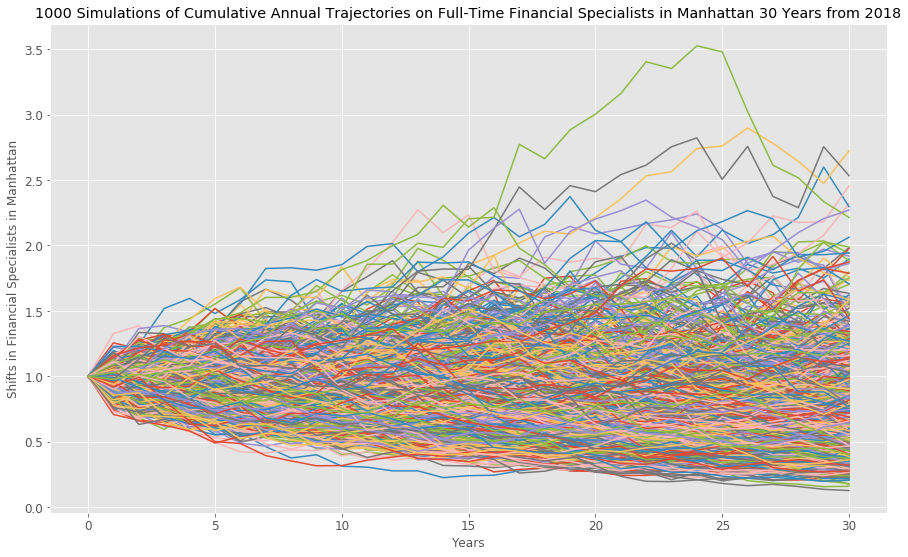

In [104]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Manhattan 30 Years from 2018"
employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Financial Specialists in Manhattan')
plt.show()

In [105]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves = employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves.head()

0    1.234813
1    0.555672
2    0.243023
3    0.421267
4    0.552653
Name: 30, dtype: float64

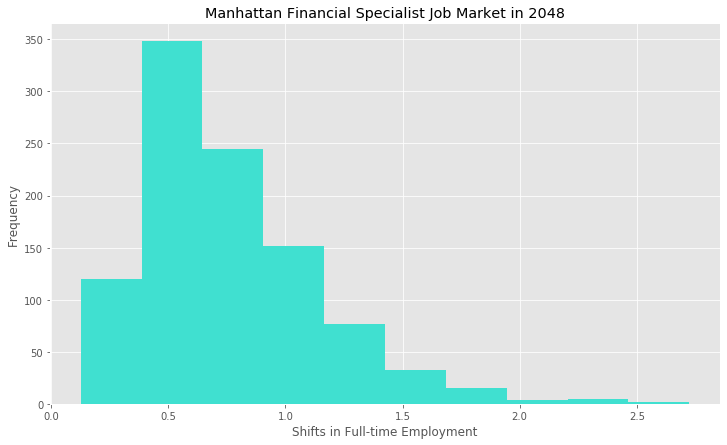

In [106]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_manhattan = plt.figure()
ending_cumulative_moves.plot(kind='hist', bins=10, color = 'turquoise', 
                             title='Manhattan Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [107]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.386, 0.646]    0.348
(0.646, 0.906]    0.245
(0.906, 1.165]    0.152
(0.123, 0.386]    0.120
(1.165, 1.425]    0.077
(1.425, 1.685]    0.032
(1.685, 1.945]    0.015
(2.205, 2.465]    0.005
(1.945, 2.205]    0.004
(2.465, 2.724]    0.002
Name: 30, dtype: float64

In [108]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval = ending_cumulative_moves.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.265931
0.975    1.702605
Name: 30, dtype: float64

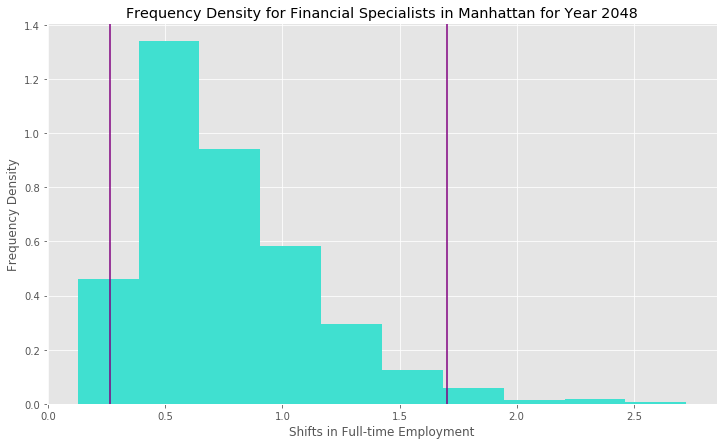

In [109]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves = plt.figure()
ending_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Frequency Density for Financial Specialists in Manhattan for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval.iloc[0], color='purple')
plt.axvline(confidence_interval.iloc[1], color='purple')
plt.show()

In [110]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves = employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves.head()

0    1.512397
1    0.754070
2    0.495152
3    0.909645
4    0.710686
Name: 11, dtype: float64

In [111]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
tenth_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.811, 0.98]     0.267
(0.643, 0.811]    0.267
(0.98, 1.149]     0.164
(0.474, 0.643]    0.136
(1.149, 1.317]    0.096
(1.317, 1.486]    0.037
(0.302, 0.474]    0.015
(1.486, 1.655]    0.011
(1.655, 1.824]    0.004
(1.824, 1.992]    0.003
Name: 11, dtype: float64

In [112]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval = tenth_cumulative_moves.quantile(q=[0.025, 0.975])
tenth_confidence_interval

0.025    0.494720
0.975    1.437638
Name: 11, dtype: float64

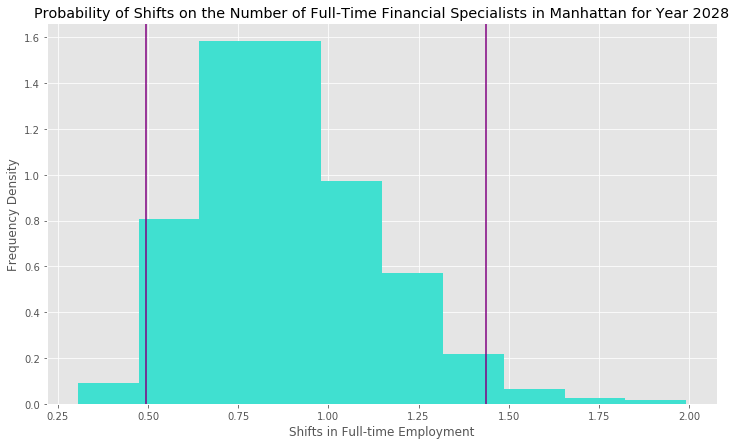

In [113]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves = plt.figure()
tenth_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Probability of Shifts on the Number of Full-Time Financial Specialists in Manhattan for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval.iloc[0], color='purple')
plt.axvline(tenth_confidence_interval.iloc[1], color='purple')
plt.show()

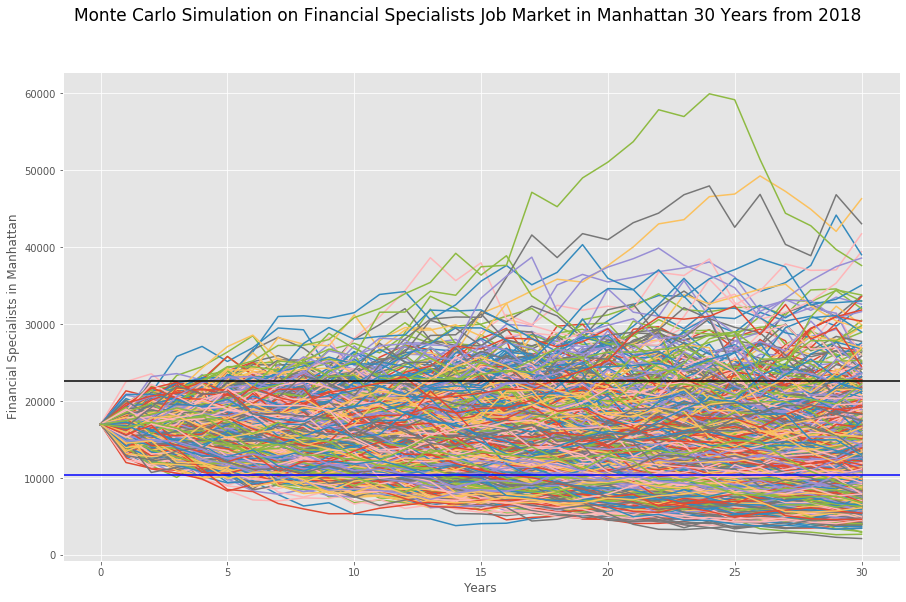

In [114]:
fig_finance = plt.figure(figsize=(15,9))
fig_finance.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Manhattan 30 Years from 2018', fontsize=17)
plt.plot(employed_cumulative_moves*17_000)
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

In [208]:
# Set initial investment
initial_employment = 17000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound = initial_employment * confidence_interval.iloc[0]
employment_gnl_upper_bound = initial_employment * confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of 17,000k in financial specialists"
      f" in Manhattan 30 years from 2018 will end within in the range of"
      f" {employment_gnl_lower_bound:,.0f}k and {employment_gnl_upper_bound:,.0f}k.")

There is a 95% chance that an initial employment of 17,000k in financial specialists in Manhattan 30 years from 2018 will end within in the range of 4,521k and 28,944k.


In [207]:
# Set initial investment
#initial_employment = 17000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound = initial_employment * tenth_confidence_interval.iloc[0]
tenth_employment_gnl_upper_bound = initial_employment * tenth_confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of 17,000k in financial specialists"
      f" in Manhattan 10 years from 2018 will end within in the range of"
      f" {tenth_employment_gnl_lower_bound:,.0f}k and {tenth_employment_gnl_upper_bound:,.0f}k.")

There is a 95% chance that an initial employment of 17,000k in financial specialists in Manhattan 10 years from 2018 will end within in the range of 8,410k and 24,440k.


In [116]:
employed_trajectories = 17_000*employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories

Lower 5%        Median      Upper 5%
0   17000.000000  17000.000000  17000.000000
1   14250.252110  16735.935238  19250.376878
2   13291.089591  16457.932791  20043.708641
3   12495.218991  16249.304657  20436.542054
4   11994.272590  16012.425374  21051.213385
5   11356.438349  15756.238588  21596.021493
6   11004.861515  15588.002153  21928.865097
7   10506.614442  15299.759454  22353.306723
8   10141.722051  15162.432638  22589.409288
9    9665.461329  15016.591778  22235.411407
10   9305.577211  14845.755542  22911.955161
11   9065.563235  14705.737823  22501.976067
12   8620.826017  14472.164346  23169.588490
13   8436.943692  14430.836091  23307.609446
14   8113.039890  14182.074678  23977.798034
15   7742.204513  13943.790588  24584.900013
16   7481.532193  13663.191644  24453.115513
17   7402.570636  13596.973342  24533.912639
18   7201.770807  13380.655065  24629.063905
19   7038.942504  13222.599472  25108.040991
20   6968.337959  13198.006496  25458.735703
21   6830.766657  12819.388753  25087.970942
22   6371.553622  12610.704160  25433.293931
23   6199.059987  12582.454508  24861.988429
24   6033.815592  12548.102212  24699.852109
25   5835.543423  12280.331441  24292.409720
26   5688.765458  12071.899200  24242.137151
27   5619.021576  11783.361798  24140.697688
28   5498.448710  11583.059487  24569.496470
29   5326.942170  11537.167156  24959.406812
30   5130.425214  11366.309947  24895.785309

<Figure size 432x288 with 0 Axes>

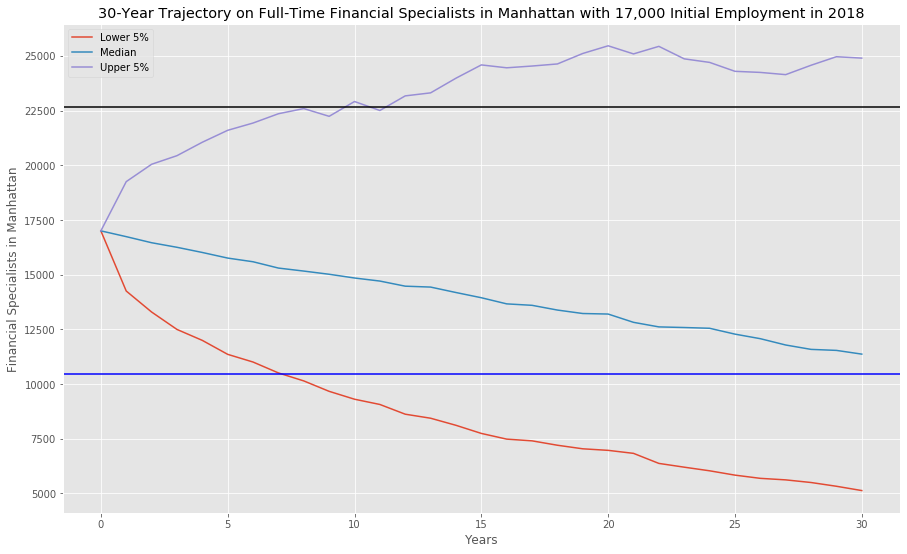

In [117]:
ax_cum_employed = plt.figure()
employed_trajectories.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Manhattan with 17,000 Initial Employment in 2018",
                          figsize=(15, 9)),
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

#### Manhattan Male Financial Specialist:

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [118]:
df_bronx = financial_specialists_Bronx
df_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [119]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_bronx = df_bronx.pct_change().fillna(0)
annual_moves_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                    0.000000   
       2011 Bronx County, New York                    0.039014   
       2012 Bronx County, New York                   -0.157115   
       2013 Bronx County, New York                   -0.228605   
       2014 Bronx County, New York                    0.647416   
       2015 Bronx County, New York                   -0.123001   
       2016 Bronx County, New York                    0.111851   
       2017 Bronx County, New York                   -0.069694   
       2018 Bronx County, New York                   -0.208136   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                      0.000000  
       2011 Bronx County, New York                     -0.066759  
       2012 Bronx County, New York                      0.179576  
       2013 Bronx County, New York                     -0.038896  
       2014 Bronx County, New York                     -0.342037  
       2015 Bronx County, New York                      0.299272  
       2016 Bronx County, New York                      0.133367  
       2017 Bronx County, New York                     -0.105547  
       2018 Bronx County, New York                     -0.086116

In [120]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_bronx_male = annual_moves_bronx.mean()['Financial_specialists_male']
avg_annual_moves_financial_bronx_female = annual_moves_bronx.mean()['Financial_specialists_female']
avg_annual_moves_financial_bronx_male

0.0013035161272441458

In [121]:
avg_annual_moves_financial_bronx_female

-0.0030153880620906737

In [122]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_bronx_male = annual_moves_bronx.std()['Financial_specialists_male']
std_dev_annual_moves_financial_bronx_female = annual_moves_bronx.std()['Financial_specialists_female']
std_dev_annual_moves_financial_bronx_male

0.26772601992691375

In [123]:
std_dev_annual_moves_financial_bronx_female

0.18742704475765454

In [124]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_bronx_male_last  = df_bronx['Financial_specialists_male'][-1]
financial_bronx_female_last = df_bronx['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_bronx_employed_df = pd.DataFrame()
bronx_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_bronx_male = []
    simulated_financial_specialist_bronx_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_bronx_male = [financial_bronx_male_last]
    simulated_financial_specialists_bronx_female = [financial_bronx_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_bronx_male = simulated_financial_specialists_bronx_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_bronx_male, std_dev_annual_moves_financial_bronx_male))
#    simulated_financial_specialist_bronx_female = simulated_financial_specialists_bronx_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_bronx_female, std_dev_annual_moves_financial_bronx_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_bronx_male.append(simulated_financial_specialist_bronx_male)
#    simulated_financial_specialists_bronx_female.append(simulated_financial_specialist_bronx_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_bronx_male = simulated_financial_specialists_bronx_male[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_male, std_dev_annual_moves_financial_bronx_male))
        simulated_financial_specialist_bronx_female = simulated_financial_specialists_bronx_female[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_female, std_dev_annual_moves_financial_bronx_female))

        simulated_financial_specialists_bronx_male.append(simulated_financial_specialist_bronx_male)
        simulated_financial_specialists_bronx_female.append(simulated_financial_specialist_bronx_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_bronx_employed_df['Financial_specialists_male'] = simulated_financial_specialists_bronx_male
    simulated_bronx_employed_df['Financial_specialists_female'] = simulated_financial_specialists_bronx_female
    
    # Calculate the daily returns of simulated prices
    simulated_bronx_employed_moves = simulated_bronx_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    bronx_employed_annual_moves = simulated_bronx_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    bronx_employed_cumulative_moves[n] = (1 + bronx_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
bronx_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.915866  0.943397  0.995209  0.793589  0.917702  0.965918  1.042084   
2   0.880494  1.034211  0.659261  0.819184  0.892237  0.986580  1.185891   
3   0.805255  0.764103  0.666133  0.797594  1.140343  1.085703  1.143289   
4   0.810799  0.770787  0.751174  0.712574  1.137603  1.131999  1.192002   
5   0.890842  0.670034  0.556996  0.422722  1.210542  1.012485  0.888984   
6   0.788317  0.724837  0.606115  0.401843  1.170051  1.266667  1.028676   
7   0.651315  0.552396  0.462254  0.370158  1.060190  1.199013  1.114014   
8   0.580334  0.674195  0.360509  0.311823  1.425499  1.108373  1.118610   
9   0.470032  0.624675  0.305881  0.289739  1.555893  1.514027  0.968042   
10  0.529560  0.654864  0.313667  0.289683  1.538423  1.770172  1.119280   
11  0.517021  0.711197  0.305659  0.299393  1.606039  1.945703  0.878426   
12  0.437041  0.983199  0.425582  0.345263  1.587732  0.855318  1.104659   
13  0.347211  0.966039  0.488122  0.281762  1.460329  0.762319  1.097643   
14  0.341980  1.021340  0.621333  0.203202  1.489884  0.958485  1.401993   
15  0.346160  0.784378  0.583390  0.254477  1.592999  0.968878  1.408215   
16  0.403958  0.796037  0.609184  0.222155  1.502687  1.050153  1.303323   
17  0.393539  0.738686  0.604436  0.199492  1.481203  0.924393  1.328066   
18  0.371943  0.782474  0.436933  0.225392  1.403363  1.102333  1.176368   
19  0.495457  0.735838  0.403675  0.240636  1.465404  1.193773  0.746886   
20  0.362716  0.709161  0.430598  0.236361  1.238774  1.115788  0.795792   
21  0.437490  0.582421  0.468092  0.231319  1.496900  1.232067  1.052421   
22  0.510544  0.577751  0.508494  0.276684  1.418643  1.084576  1.211795   
23  0.478437  0.466293  0.579824  0.312244  1.362117  1.074162  1.301607   
24  0.537824  0.441348  0.385165  0.315158  1.044973  1.287104  1.347309   
25  0.601803  0.555976  0.257548  0.386095  1.145126  1.173229  1.409782   
26  0.535183  0.454743  0.244612  0.359575  1.242930  1.337413  1.738951   
27  0.663665  0.478621  0.216247  0.353794  1.399373  0.946669  2.207081   
28  0.571963  0.584273  0.230729  0.350679  1.889023  0.688784  2.307146   
29  0.539706  0.502390  0.252889  0.384701  2.286141  0.575835  2.234427   
30  0.514938  0.538470  0.241971  0.323221  2.223139  0.607658  2.644840   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.979685  0.883847  1.074037  ...  0.971541  1.070299  1.024086  0.607164   
2   0.680371  1.038444  1.219655  ...  0.867531  0.913192  0.939561  0.744273   
3   0.557184  0.766388  1.041819  ...  0.986625  0.772705  0.914711  0.775404   
4   0.508945  0.905170  0.957557  ...  1.051205  0.797974  0.991330  0.748665   
5   0.552267  0.833640  0.595139  ...  1.022771  0.845141  0.779227  0.753001   
6   0.498699  0.941507  0.553756  ...  1.061023  1.084968  0.548096  0.776026   
7   0.656669  0.734787  0.515080  ...  0.895522  1.333115  0.563575  0.827866   
8   0.557532  0.765416  0.404797  ...  0.773414  1.211648  0.432990  0.958466   
9   0.501442  0.857752  0.275681  ...  0.858510  1.345336  0.388403  1.018433   
10  0.533897  0.830580  0.366931  ...  0.988713  1.197891  0.446624  1.338893   
11  0.466329  0.850971  0.459903  ...  0.800769  1.298865  0.424675  1.418215   
12  0.354467  0.900923  0.482101  ...  0.915986  1.298196  0.491559  1.197151   
13  0.389155  0.960224  0.399062  ...  0.819205  1.060879  0.621714  1.468531   
14  0.391530  1.311823  0.305122  ...  0.787190  1.191626  0.599561  1.362803   
15  0.384245  1.136890  0.316876  ...  0.499225  1.376239  0.628543  1.829335   
16  0.375249  1.195757  0.382436  ...  0.396447  1.227211  0.672066  1.504417   
17  0.237857  1.139682  0.370374  ...  0.521026  1.342542  0.512110  1.262150   
18  0.302690  1.257636  0.348376  ...

<Figure size 432x288 with 0 Axes>

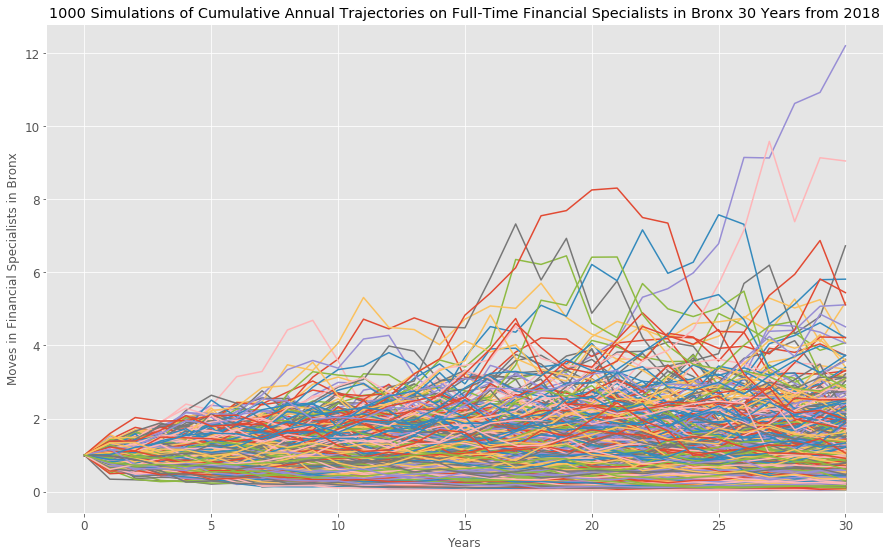

In [125]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_bronx = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Bronx 30 Years from 2018"
bronx_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Bronx')
plt.show()

In [126]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_bronx.head()

0    0.514938
1    0.538470
2    0.241971
3    0.323221
4    2.223139
Name: 30, dtype: float64

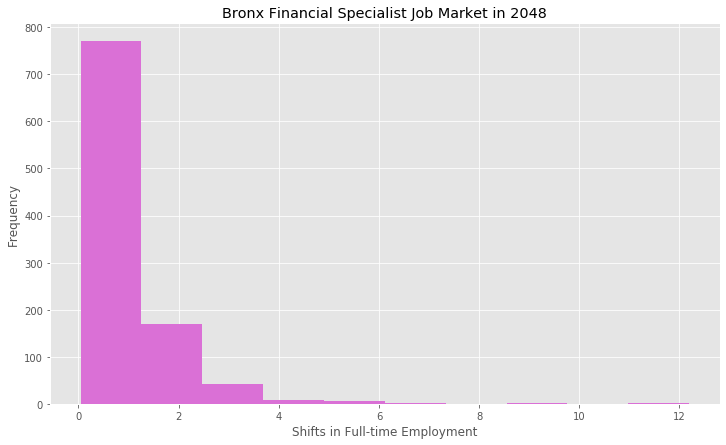

In [127]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', bins=10, color = 'orchid', 
                             title='Bronx Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [128]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_bronx = ending_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
confidence_interval_bronx

0.025    0.098611
0.975    3.225828
Name: 30, dtype: float64

In [129]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_bronx.value_counts(bins=10) / len(ending_cumulative_moves_bronx)

(0.0275, 1.256]     0.770
(1.256, 2.471]      0.170
(2.471, 3.687]      0.043
(3.687, 4.902]      0.009
(4.902, 6.118]      0.005
(10.979, 12.194]    0.001
(8.548, 9.764]      0.001
(6.118, 7.333]      0.001
(9.764, 10.979]     0.000
(7.333, 8.548]      0.000
Name: 30, dtype: float64

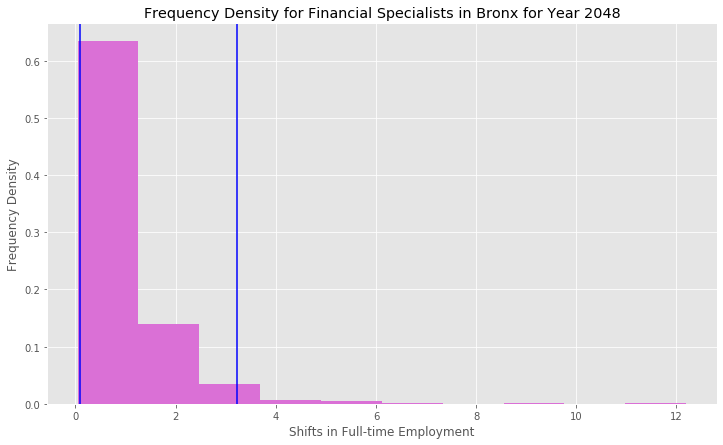

In [130]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(confidence_interval_bronx.iloc[1], color='blue')
plt.show()

In [131]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_bronx.head()

0    0.517021
1    0.711197
2    0.305659
3    0.299393
4    1.606039
Name: 11, dtype: float64

In [132]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_bronx = tenth_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
tenth_confidence_interval_bronx

0.025    0.243172
0.975    2.309054
Name: 11, dtype: float64

In [133]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_bronx.value_counts(bins=10) / len(tenth_cumulative_moves_bronx)

(0.619, 1.14]                   0.399
(0.09129999999999999, 0.619]    0.284
(1.14, 1.662]                   0.195
(1.662, 2.183]                  0.080
(2.183, 2.704]                  0.030
(2.704, 3.226]                  0.008
(4.79, 5.311]                   0.001
(4.268, 4.79]                   0.001
(3.747, 4.268]                  0.001
(3.226, 3.747]                  0.001
Name: 11, dtype: float64

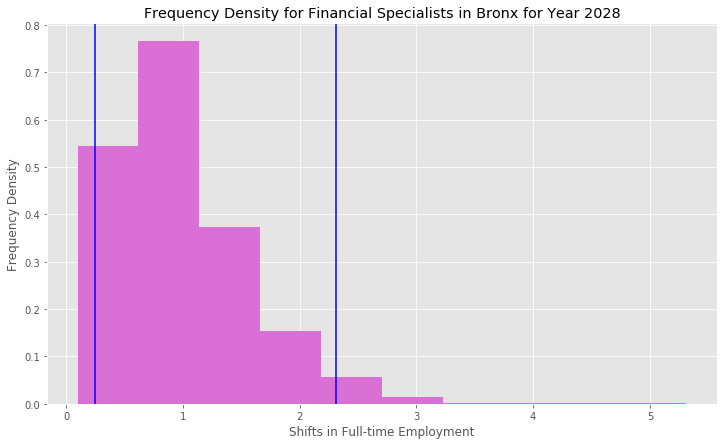

In [134]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_bronx = plt.figure()
tenth_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(tenth_confidence_interval_bronx.iloc[1], color='blue')
plt.show()

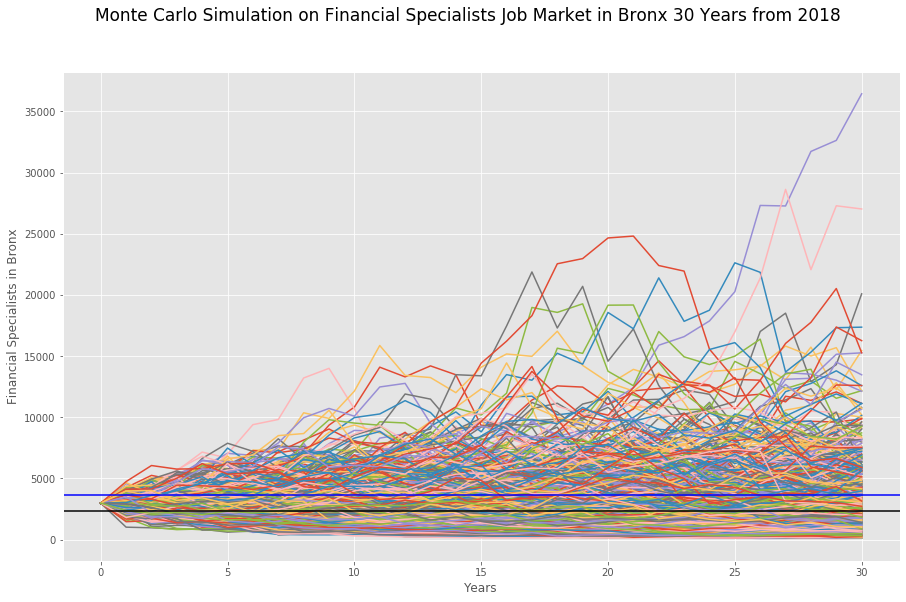

In [135]:
fig_finance_bronx = plt.figure(figsize=(15,9))
fig_finance_bronx.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Bronx 30 Years from 2018', fontsize=17)
plt.plot(bronx_employed_cumulative_moves*2_988)
plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

In [209]:
# Set initial investment
initial_employment_bronx = 0.5*(financial_bronx_male_last + financial_bronx_female_last)

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[0]
employment_gnl_upper_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f}k in financial specialists"
      f" over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_bronx:,.0f}k and {employment_gnl_upper_bound_bronx:,.0f}k.")

There is a 95% chance that an initial employment of 2,988k in financial specialists over the next 30 years will end within in the range of 295k and 9,639k.


In [211]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_bronx = initial_employment_bronx * tenth_confidence_interval_bronx.iloc[0]
tenth_employment_gnl_upper_bound_bronx = initial_employment_bronx * tenth_confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f}k in financial specialists"
      f" over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_bronx:,.0f}k and {tenth_employment_gnl_upper_bound_bronx:,.0f}k.")

There is a 95% chance that an initial employment of 2,988k in financial specialists over the next 10 years will end within in the range of 727k and 6,899k.


In [137]:
employed_trajectories_bronx = initial_employment_bronx * bronx_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_bronx.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_bronx

Lower 5%       Median     Upper 5%
0   2988.000000  2988.000000  2988.000000
1   2150.058915  2978.114801  3797.076902
2   1877.652016  2914.933673  4229.679402
3   1676.497172  2859.582761  4501.751603
4   1509.718206  2855.276779  4807.810796
5   1485.174648  2741.359427  4968.154113
6   1354.463513  2766.028807  5178.678234
7   1217.153516  2689.377784  5465.505992
8   1149.044287  2696.031537  5540.941631
9   1052.796633  2671.271083  5941.623624
10   988.893781  2599.701829  6054.208443
11   938.699811  2532.074645  6365.324598
12   883.741035  2546.467967  6278.518495
13   829.810170  2531.210361  6366.347247
14   779.809037  2498.562714  6608.479083
15   741.870780  2377.405486  6598.732989
16   699.710383  2355.164790  6576.239453
17   698.068546  2345.263470  7017.271576
18   673.462339  2294.798840  6967.603374
19   623.734638  2226.778254  7014.124245
20   583.661055  2158.761426  7336.608135
21   581.805235  2202.993736  7407.967448
22   561.683599  2115.666345  7330.455033
23   516.621116  2123.406991  7151.099691
24   483.734304  2078.654942  7408.677318
25   499.735771  2025.099149  7487.030803
26   471.798194  1999.850423  7590.730583
27   461.467591  1982.087818  7895.057673
28   448.872982  1880.425227  7564.311528
29   427.315405  1893.569051  7704.394650
30   416.884981  1846.799166  7622.066801

<Figure size 432x288 with 0 Axes>

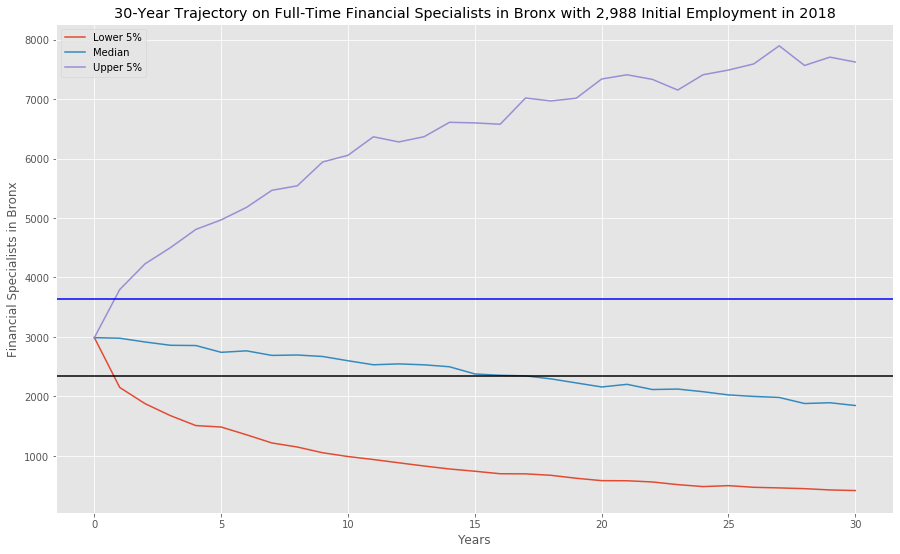

In [138]:
ax_cum_employed_bronx = plt.figure()
employed_trajectories_bronx.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Bronx with 2,988 Initial Employment in 2018",
                          figsize=(15, 9)),
plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Brooklyn Over 30 Years Starting from 2018

In [139]:
df_brooklyn = financial_specialists_Brooklyn
df_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [140]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_brooklyn = df_brooklyn.pct_change().fillna(0)
annual_moves_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                    0.000000   
       2011 Kings County, New York                    0.172906   
       2012 Kings County, New York                   -0.121464   
       2013 Kings County, New York                   -0.012385   
       2014 Kings County, New York                    0.098096   
       2015 Kings County, New York                   -0.145927   
       2016 Kings County, New York                    0.105586   
       2017 Kings County, New York                    0.039957   
       2018 Kings County, New York                   -0.040403   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                      0.000000  
       2011 Kings County, New York                     -0.130064  
       2012 Kings County, New York                      0.205243  
       2013 Kings County, New York                     -0.003890  
       2014 Kings County, New York                     -0.227942  
       2015 Kings County, New York                      0.340308  
       2016 Kings County, New York                     -0.117773  
       2017 Kings County, New York                      0.148858  
       2018 Kings County, New York                      0.176625

In [141]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.mean()['Financial_specialists_male']
avg_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.mean()['Financial_specialists_female']
avg_annual_moves_financial_brooklyn_male

0.01070735087759309

In [142]:
avg_annual_moves_financial_brooklyn_female

0.0434848383701982

In [143]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.std()['Financial_specialists_male']
std_dev_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.std()['Financial_specialists_female']
std_dev_annual_moves_financial_brooklyn_male

0.1055144120259476

In [144]:
std_dev_annual_moves_financial_brooklyn_female

0.1860883242930192

In [145]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_brooklyn_male_last  = df_brooklyn['Financial_specialists_male'][-1]
financial_brooklyn_female_last = df_brooklyn['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_brooklyn_employed_df = pd.DataFrame()
brooklyn_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_brooklyn_male = []
    simulated_financial_specialist_brooklyn_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_brooklyn_male = [financial_brooklyn_male_last]
    simulated_financial_specialists_brooklyn_female = [financial_brooklyn_female_last]
    
            
    # Calculate the simulated price using the last price within the list
 #   simulated_financial_specialist_brooklyn_male = simulated_financial_specialists_brooklyn_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
 #   simulated_financial_specialist_brooklyn_female = simulated_financial_specialists_brooklyn_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

    # Append the simulated price to the list
  #  simulated_financial_specialists_brooklyn_male.append(simulated_financial_specialist_brooklyn_male)
  #  simulated_financial_specialists_brooklyn_female.append(simulated_financial_specialist_brooklyn_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_brooklyn_male = simulated_financial_specialists_brooklyn_male[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
        simulated_financial_specialist_brooklyn_female = simulated_financial_specialists_brooklyn_female[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

        simulated_financial_specialists_brooklyn_male.append(simulated_financial_specialist_brooklyn_male)
        simulated_financial_specialists_brooklyn_female.append(simulated_financial_specialist_brooklyn_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_brooklyn_employed_df['Financial_specialists_male'] = simulated_financial_specialists_brooklyn_male
    simulated_brooklyn_employed_df['Financial_specialists_female'] = simulated_financial_specialists_brooklyn_female
    
    # Calculate the daily returns of simulated prices
    simulated_brooklyn_employed_moves = simulated_brooklyn_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    brooklyn_employed_annual_moves = simulated_brooklyn_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    brooklyn_employed_cumulative_moves[n] = (1 + brooklyn_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
brooklyn_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.011180  1.000315  1.052522  1.038893  1.173601  1.058197  0.986926   
2   0.979554  1.093832  0.994329  0.975334  1.370164  1.215092  1.084854   
3   1.158081  1.020327  0.981458  1.055721  1.388619  1.265612  1.112305   
4   1.209644  0.979544  0.956673  1.298732  1.476083  1.274268  1.215568   
5   1.174411  1.004500  0.867712  1.240235  1.281211  1.516982  1.070252   
6   1.161324  1.208882  0.980823  0.940486  1.095962  1.735966  1.177426   
7   1.199440  1.211372  1.030937  1.058430  1.105980  2.215889  1.383416   
8   1.162485  1.128804  1.014808  1.399099  1.022255  2.237167  1.509504   
9   1.091466  1.127724  0.898370  1.453619  1.130835  2.389362  1.620597   
10  1.216172  1.248984  0.945513  1.419252  1.261070  2.508273  1.753227   
11  1.246890  1.160648  0.709956  1.517017  1.109844  2.127843  1.887776   
12  1.338658  1.359958  0.751851  1.744486  1.073213  2.354204  2.111741   
13  1.165369  1.445944  0.859154  1.562602  1.258157  2.764455  1.949490   
14  1.156121  1.568316  0.763149  1.318758  1.316642  2.957235  1.651453   
15  1.218141  1.514021  0.833777  1.381179  1.447148  3.108725  1.701041   
16  1.379828  1.690304  0.847162  1.083729  1.981190  3.424908  1.631829   
17  1.640481  1.991422  0.887524  1.238183  2.189343  3.541076  1.744325   
18  1.739087  2.435079  0.949613  1.275311  2.389815  3.680307  1.646778   
19  1.772081  2.317486  1.033134  1.592067  2.369569  3.400302  1.712516   
20  2.022587  2.157762  0.937792  1.571763  2.537322  3.528697  1.577141   
21  2.358945  2.421058  0.808294  1.682770  2.721014  3.020866  1.838265   
22  2.729337  2.689160  1.022240  2.024672  3.332418  3.591226  1.690200   
23  3.201265  2.478198  1.025263  2.068052  3.831644  3.081253  1.513243   
24  3.039735  2.398293  0.952012  1.915794  4.765903  2.314704  1.499558   
25  3.595700  2.103995  1.004056  1.497396  5.287336  2.373189  1.513157   
26  3.103466  2.032928  1.226880  1.609075  5.799573  2.628400  1.447020   
27  3.912198  2.014144  1.436591  1.337401  5.564449  3.180864  1.454222   
28  4.115400  2.315788  1.595172  1.415841  5.713621  3.564598  1.422802   
29  3.852703  2.842879  1.616111  1.350489  6.706269  3.560089  1.578297   
30  4.356928  2.763471  1.668145  1.265537  8.361995  3.576031  1.643148   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.032135  1.014755  1.030346  ...  0.944312  1.117948  0.796621  0.971340   
2   1.004813  0.999020  1.111826  ...  1.008001  1.200431  0.790461  1.040564   
3   1.078320  0.828567  1.054043  ...  0.857831  1.219633  0.859064  1.026143   
4   1.001887  0.817282  1.131785  ...  0.804991  1.137366  0.931971  1.199728   
5   1.096316  0.700427  1.149388  ...  0.721929  1.459789  0.875732  1.413762   
6   1.011772  0.694936  1.245813  ...  0.706138  1.611652  0.995082  1.373764   
7   1.041976  0.830226  1.248216  ...  0.706216  1.715053  1.149045  1.323775   
8   1.093259  0.935636  1.328615  ...  0.716478  1.921128  1.252976  1.280655   
9   1.168788  1.020495  1.188753  ...  0.653901  1.643268  1.373584  1.274938   
10  1.335906  1.055501  1.091916  ...  0.619274  1.775712  1.639592  1.007521   
11  1.587800  1.322196  1.141696  ...  0.715777  1.712217  1.808264  1.198968   
12  1.907270  1.277803  1.270523  ...  0.772439  1.881553  2.329460  1.140587   
13  2.004083  1.321276  1.174609  ...  0.673104  1.751605  2.357844  1.099667   
14  1.971815  1.404571  1.100047  ...  0.735128  1.782324  2.463013  1.238418   
15  1.700705  1.384461  1.261153  ...  0.637529  1.531152  2.429803  1.159634   
16  1.764082  1.591222  1.266453  ...  0.639116  1.633640  2.673216  1.291062   
17  1.719060  1.672451  1.149822  ...  0.823560  1.485593  3.253223  1.438309   
18  1.887935  1.720381  1.221318  ...

<Figure size 432x288 with 0 Axes>

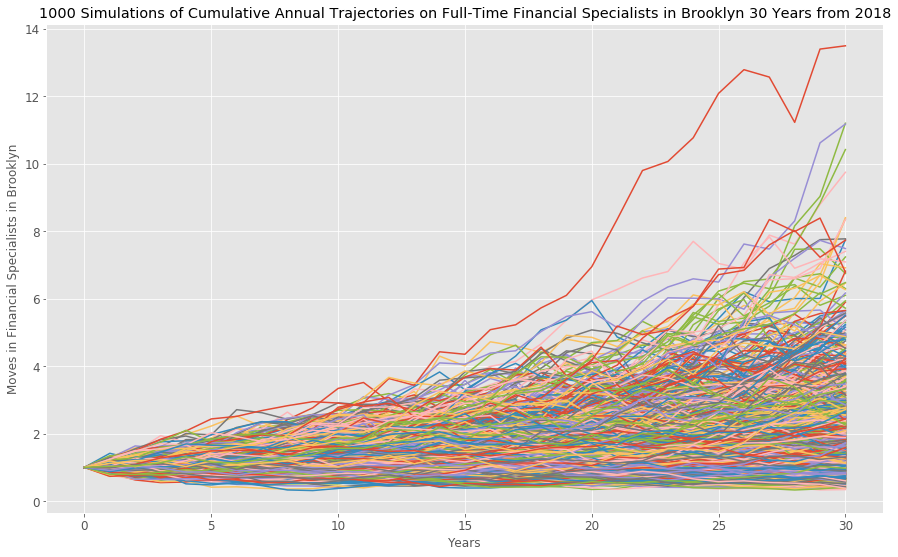

In [146]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_brooklyn = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Brooklyn 30 Years from 2018"
brooklyn_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Brooklyn')
plt.show()

In [147]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_brooklyn.head()

0    4.356928
1    2.763471
2    1.668145
3    1.265537
4    8.361995
Name: 30, dtype: float64

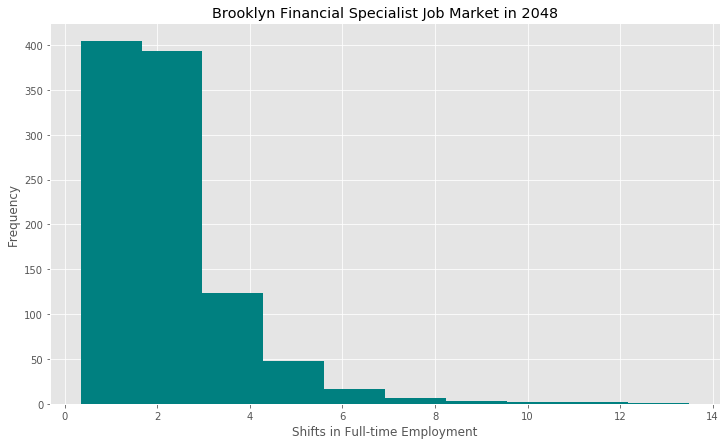

In [148]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', bins=10, color = 'Teal', 
                             title='Brooklyn Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [149]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_brooklyn = ending_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
confidence_interval_brooklyn

0.025    0.613601
0.975    5.940834
Name: 30, dtype: float64

In [150]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
ending_cumulative_moves_brooklyn.value_counts(bins=10) / len(ending_cumulative_moves_brooklyn)

(0.327, 1.657]      0.404
(1.657, 2.972]      0.393
(2.972, 4.288]      0.124
(4.288, 5.604]      0.048
(5.604, 6.919]      0.016
(6.919, 8.235]      0.007
(8.235, 9.55]       0.003
(10.866, 12.182]    0.002
(9.55, 10.866]      0.002
(12.182, 13.497]    0.001
Name: 30, dtype: float64

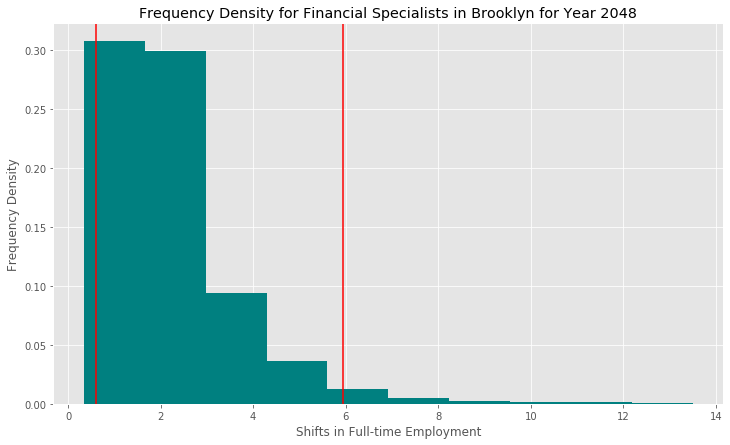

In [151]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_cum_moves_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

In [152]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_brooklyn.head()

0    1.246890
1    1.160648
2    0.709956
3    1.517017
4    1.109844
Name: 11, dtype: float64

In [153]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_brooklyn = tenth_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
tenth_confidence_interval_brooklyn

0.025    0.671975
0.975    2.474113
Name: 11, dtype: float64

In [154]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
tenth_cumulative_moves_brooklyn.value_counts(bins=10) / len(tenth_cumulative_moves_brooklyn)

(1.016, 1.329]    0.306
(0.704, 1.016]    0.220
(1.329, 1.641]    0.198
(1.641, 1.954]    0.136
(1.954, 2.266]    0.054
(0.387, 0.704]    0.040
(2.266, 2.579]    0.028
(2.579, 2.891]    0.012
(2.891, 3.204]    0.005
(3.204, 3.516]    0.001
Name: 11, dtype: float64

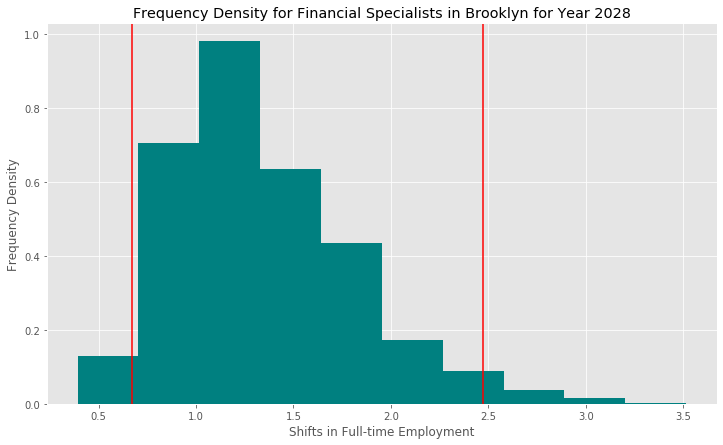

In [155]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves_brooklyn = plt.figure()
tenth_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

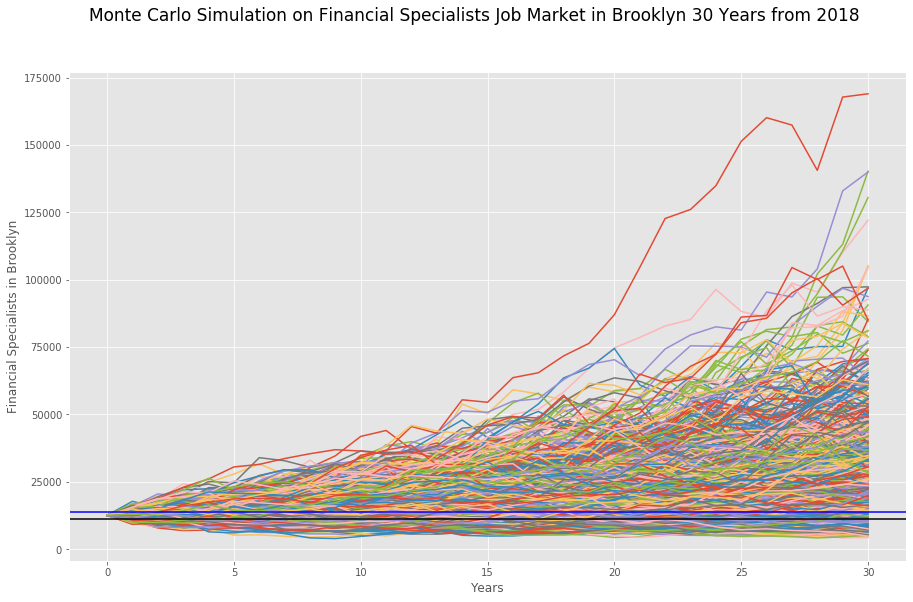

In [156]:
# Set initial employment
initial_employment_brooklyn = 0.5*(financial_brooklyn_male_last + financial_brooklyn_female_last)

# Plot scaled monte-carlo simulation for Brooklyn job market
fig_finance_brooklyn = plt.figure(figsize=(15,9))
fig_finance_brooklyn.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Brooklyn 30 Years from 2018', fontsize=17)
plt.plot(brooklyn_employed_cumulative_moves * initial_employment_brooklyn)
plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

In [214]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[0]
employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f}k in financial specialists"
      f" in Brooklyn over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_brooklyn:,.0f}k and {employment_gnl_upper_bound_brooklyn:,.0f}k.")

There is a 95% chance that an initial employment of 12,521k in financial specialists in Brooklyn over the next 30 years will end within in the range of 7,683k and 74,385k.


In [215]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * tenth_confidence_interval_brooklyn.iloc[0]
tenth_employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * tenth_confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f}k in financial specialists"
      f" in Brooklyn over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_brooklyn:,.0f}k and {tenth_employment_gnl_upper_bound_brooklyn:,.0f}k.")

There is a 95% chance that an initial employment of 12,521k in financial specialists in Brooklyn over the next 10 years will end within in the range of 8,414k and 30,978k.


In [158]:
employed_trajectories_brooklyn = initial_employment_brooklyn * brooklyn_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_brooklyn.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_brooklyn

Lower 5%        Median      Upper 5%
0   12521.000000  12521.000000  12521.000000
1   10655.490885  12883.269180  15218.626310
2   10281.895254  13058.311551  16372.646326
3    9957.540787  13326.643414  17560.483475
4    9598.774209  13674.295654  18718.660665
5    9573.725113  13816.148129  20147.359943
6    9386.018049  14220.735824  21327.057671
7    9122.541452  14629.453827  22804.089102
8    9188.643223  14717.981906  23781.465455
9    9064.726173  15164.212457  25699.014978
10   8941.531361  15530.122975  27197.026886
11   8957.752348  15668.638583  27665.206969
12   8864.525623  16197.731606  28776.040486
13   9071.468601  16427.783559  30728.682008
14   9287.941922  16744.408103  31672.217285
15   9497.935321  17264.830576  33737.959640
16   9152.306841  17533.150537  35826.613164
17   8924.911849  18116.381452  36714.044398
18   9089.945019  18357.655192  37794.900649
19   9341.922261  18693.070491  39960.317979
20   9273.464382  19304.566381  43198.872014
21   9219.922666  19988.767982  43407.652510
22   9362.687431  20501.108298  44926.849388
23   9115.714004  20964.061710  49068.775187
24   8899.755290  21063.055132  51028.508108
25   8894.973725  21428.984558  52499.139840
26   9048.282832  21893.700653  53420.760825
27   9251.905314  22767.631584  55156.573206
28   9278.010767  22945.859815  55939.230646
29   9090.232241  23760.487758  60382.707908
30   9229.420872  23769.583578  61685.303051

<Figure size 432x288 with 0 Axes>

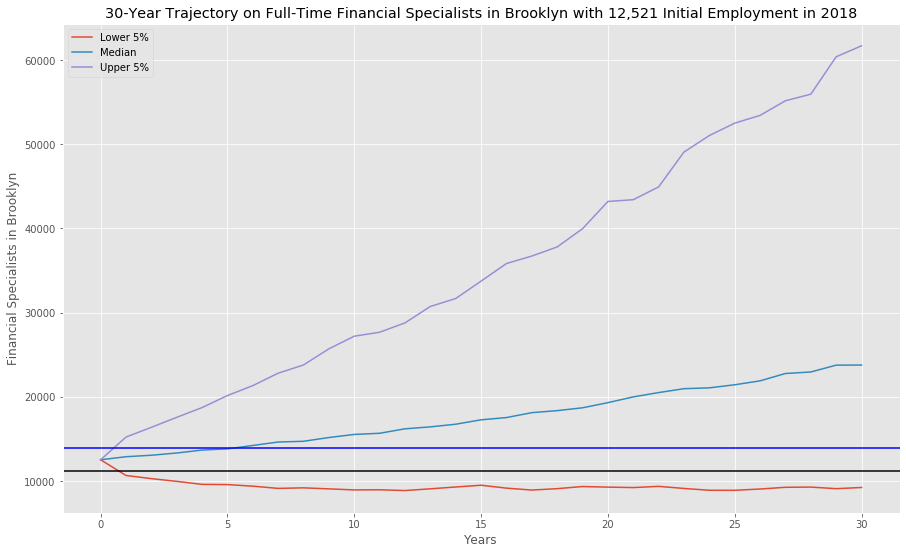

In [159]:
ax_cum_employed_brooklyn = plt.figure()
employed_trajectories_brooklyn.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Brooklyn with 12,521 Initial Employment in 2018",
                          figsize=(15, 9))
plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Queens Over 30 Years Starting from 2018

In [160]:
df_queens = financial_specialists_Queens
df_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [161]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_queens = df_queens.pct_change().fillna(0)
annual_moves_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                    0.000000   
       2011 Queens County, New York                   -0.015312   
       2012 Queens County, New York                    0.005618   
       2013 Queens County, New York                    0.006153   
       2014 Queens County, New York                   -0.038622   
       2015 Queens County, New York                    0.160362   
       2016 Queens County, New York                   -0.076385   
       2017 Queens County, New York                    0.154002   
       2018 Queens County, New York                   -0.222170   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                      0.000000  
       2011 Queens County, New York                     -0.047048  
       2012 Queens County, New York                     -0.009277  
       2013 Queens County, New York                      0.170426  
       2014 Queens County, New York                     -0.077153  
       2015 Queens County, New York                      0.063626  
       2016 Queens County, New York                     -0.029201  
       2017 Queens County, New York                     -0.006279  
       2018 Queens County, New York                     -0.024245

In [162]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_queens_male = annual_moves_queens.mean()['Financial_specialists_male']
avg_annual_moves_financial_queens_female = annual_moves_queens.mean()['Financial_specialists_female']
avg_annual_moves_financial_queens_male

-0.0029282782346636343

In [163]:
avg_annual_moves_financial_queens_female

0.004538725855711283

In [164]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_queens_male = annual_moves_queens.std()['Financial_specialists_male']
std_dev_annual_moves_financial_queens_female = annual_moves_queens.std()['Financial_specialists_female']
std_dev_annual_moves_financial_queens_male

0.11529577070807671

In [165]:
std_dev_annual_moves_financial_queens_female

0.07300685227824968

In [166]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_queens_male_last  = df_queens['Financial_specialists_male'][-1]
financial_queens_female_last = df_queens['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_queens_employed_df = pd.DataFrame()
queens_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_queens_male = []
    simulated_financial_specialist_queens_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_queens_male = [financial_queens_male_last]
    simulated_financial_specialists_queens_female = [financial_queens_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_queens_male = simulated_financial_specialists_queens_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_queens_male, std_dev_annual_moves_financial_queens_male))
 #   simulated_financial_specialist_queens_female = simulated_financial_specialists_queens_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_queens_female, std_dev_annual_moves_financial_queens_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_queens_male.append(simulated_financial_specialist_queens_male)
#    simulated_financial_specialists_queens_female.append(simulated_financial_specialist_queens_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_queens_male = simulated_financial_specialists_queens_male[count] * (1 + np.random.normal(avg_annual_moves_financial_queens_male, std_dev_annual_moves_financial_queens_male))
        simulated_financial_specialist_queens_female = simulated_financial_specialists_queens_female[count] * (1 + np.random.normal(avg_annual_moves_financial_queens_female, std_dev_annual_moves_financial_queens_female))

        simulated_financial_specialists_queens_male.append(simulated_financial_specialist_queens_male)
        simulated_financial_specialists_queens_female.append(simulated_financial_specialist_queens_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_queens_employed_df['Financial_specialists_male'] = simulated_financial_specialists_queens_male
    simulated_queens_employed_df['Financial_specialists_female'] = simulated_financial_specialists_queens_female
    
    # Calculate the daily returns of simulated prices
    simulated_queens_employed_moves = simulated_queens_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    queens_employed_annual_moves = simulated_queens_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    queens_employed_cumulative_moves[n] = (1 + queens_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
queens_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.960892  0.997050  1.018732  0.957957  0.991663  0.884586  1.015136   
2   0.976943  1.003283  1.077063  1.037162  1.056608  0.863863  0.962304   
3   1.057631  1.026735  1.003881  1.141519  1.083376  0.989612  1.014231   
4   1.057862  1.034815  1.105455  1.292964  1.060748  0.958257  1.065329   
5   1.103480  1.086753  1.118527  1.270852  1.100235  1.043073  0.956386   
6   1.215548  1.011789  1.281651  1.200202  1.155857  0.983233  0.882831   
7   1.109519  0.951725  1.329504  1.162738  1.106452  0.963459  0.911014   
8   1.303239  0.939349  1.263424  1.159272  1.059043  0.987363  0.983870   
9   1.311534  0.972454  1.312560  1.117811  0.995229  1.047598  0.933524   
10  1.309543  0.935455  1.230945  1.173319  0.931466  0.998243  1.007372   
11  1.251504  1.042056  1.306972  1.169307  0.805695  1.139068  1.062461   
12  1.013684  1.096033  1.175305  1.204610  0.796988  1.203134  1.163155   
13  0.995830  1.050323  1.162514  1.115708  0.810371  1.204550  1.340841   
14  0.924114  1.042723  1.084368  1.075842  0.855204  1.093687  1.404157   
15  0.890918  1.023501  1.115864  1.186946  0.804040  1.088047  1.619502   
16  0.865581  1.151399  1.231738  1.103877  0.750963  0.867347  1.774736   
17  0.893860  1.105441  1.215631  1.173366  0.712397  0.884881  1.904230   
18  0.912902  1.017683  1.316387  1.137510  0.657025  0.905179  1.672235   
19  0.853041  0.976432  1.336364  1.078908  0.688016  0.993904  1.701353   
20  0.750383  0.906056  1.235619  1.080429  0.683401  0.989087  1.816178   
21  0.739492  0.851652  1.301036  1.052845  0.615729  0.968284  1.789244   
22  0.702896  0.866729  1.301064  1.113132  0.644303  0.993483  1.814902   
23  0.737260  0.811594  1.310254  1.200299  0.702250  0.982759  1.788056   
24  0.772106  0.778788  1.405928  1.309531  0.702561  0.990435  1.804277   
25  0.874833  0.844284  1.272737  1.278762  0.711118  1.101237  1.850490   
26  0.866604  0.791532  1.066664  1.370762  0.675135  1.046792  1.781776   
27  0.886268  0.784141  0.973810  1.447630  0.615933  1.050254  1.786920   
28  0.829184  0.826638  1.068337  1.424342  0.623748  0.958250  1.787929   
29  0.803934  0.842327  1.086645  1.452131  0.585101  0.994041  1.681830   
30  0.802467  0.809038  1.159601  1.597996  0.535625  1.001033  1.814593   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.914282  0.968836  1.041860  ...  0.964497  0.996155  0.922624  0.914669   
2   0.964841  0.988256  0.953772  ...  0.998753  1.011487  0.771648  0.971554   
3   0.993963  1.025422  0.884559  ...  1.055098  0.937210  0.795895  0.986925   
4   0.995567  1.037310  0.910787  ...  1.029944  0.951868  0.865128  0.941923   
5   0.912889  1.076618  0.989682  ...  1.076736  1.024551  0.823536  1.013734   
6   0.928825  1.121120  1.058021  ...  1.156483  0.991584  0.941166  0.933133   
7   0.960859  1.129613  1.150173  ...  1.248921  0.997862  0.888923  1.023604   
8   1.060801  1.146096  1.134095  ...  1.249508  1.051191  0.975624  1.234097   
9   1.039569  1.104283  1.126259  ...  1.323880  1.116791  1.002547  1.128508   
10  0.916352  1.122508  1.122541  ...  1.372576  1.045429  1.028517  1.027097   
11  0.883500  1.116070  1.093641  ...  1.469984  1.075508  0.938284  0.938715   
12  0.930813  1.105729  1.119474  ...  1.513833  1.062437  0.829654  0.930342   
13  0.925930  1.198305  1.220227  ...  1.444128  1.049538  0.857592  0.841034   
14  0.870916  1.173791  1.184273  ...  1.397602  1.025356  0.887039  0.819291   
15  0.974771  1.296270  1.166480  ...  1.429357  1.079765  0.907122  0.848294   
16  0.942546  1.216524  1.189996  ...  1.398267  1.094827  0.864361  0.789489   
17  0.891195  1.205799  1.168073  ...  1.448378  1.028297  0.732359  0.714004   
18  0.809366  1.069661  1.176665  ...

<Figure size 432x288 with 0 Axes>

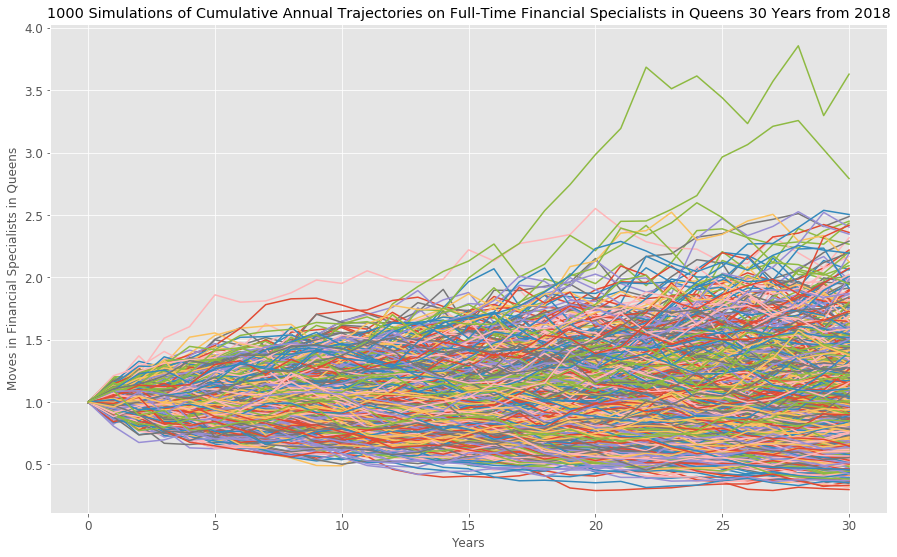

In [167]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_queens = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Queens 30 Years from 2018"
queens_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Queens')
plt.show()

In [168]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_queens.head()

0    0.802467
1    0.809038
2    1.159601
3    1.597996
4    0.535625
Name: 30, dtype: float64

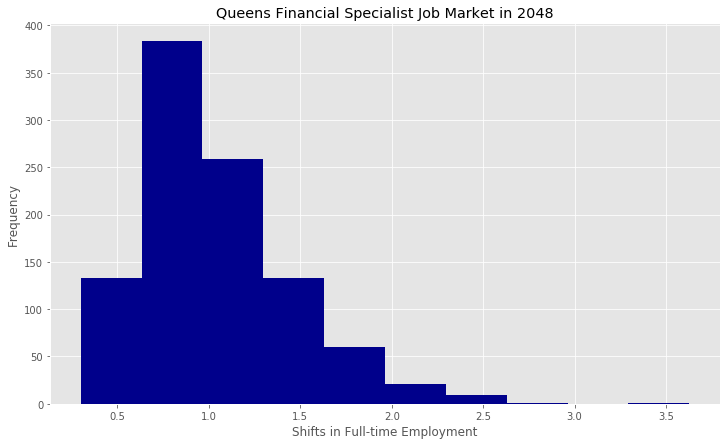

In [169]:
# Use the `plot` function to plot a frequency distribution of simulated ending employment
fig_hist_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', bins=10, color = 'darkblue', 
                             title='Queens Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [170]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_queens = ending_cumulative_moves_queens.quantile(q=[0.025, 0.975])
confidence_interval_queens

0.025    0.435023
0.975    2.023506
Name: 30, dtype: float64

In [171]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_queens.value_counts(bins=10) / len(ending_cumulative_moves_queens)

(0.631, 0.964]    0.383
(0.964, 1.297]    0.259
(1.297, 1.63]     0.133
(0.294, 0.631]    0.133
(1.63, 1.963]     0.060
(1.963, 2.296]    0.021
(2.296, 2.629]    0.009
(3.295, 3.628]    0.001
(2.629, 2.962]    0.001
(2.962, 3.295]    0.000
Name: 30, dtype: float64

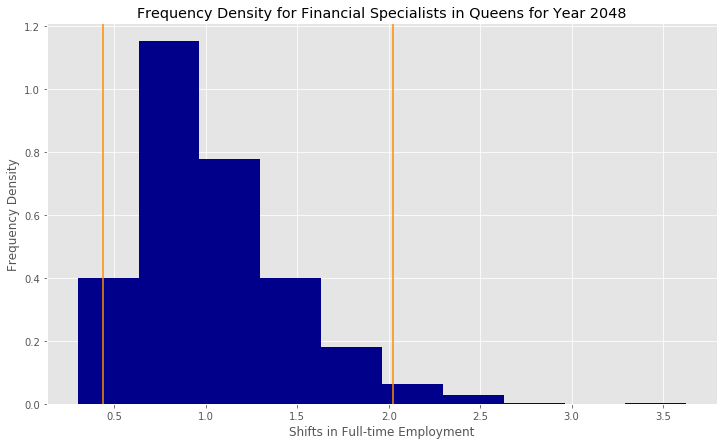

In [172]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

In [173]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_queens.head()

0    1.251504
1    1.042056
2    1.306972
3    1.169307
4    0.805695
Name: 11, dtype: float64

In [174]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_queens = tenth_cumulative_moves_queens.quantile(q=[0.025, 0.975])
tenth_confidence_interval_queens

0.025    0.638674
0.975    1.509060
Name: 11, dtype: float64

In [175]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_queens.value_counts(bins=10) / len(tenth_cumulative_moves_queens)

(0.803, 0.959]    0.259
(0.959, 1.115]    0.239
(1.115, 1.271]    0.182
(0.647, 0.803]    0.166
(1.271, 1.428]    0.072
(1.428, 1.584]    0.042
(0.489, 0.647]    0.028
(1.584, 1.74]     0.011
(1.896, 2.052]    0.001
(1.74, 1.896]     0.000
Name: 11, dtype: float64

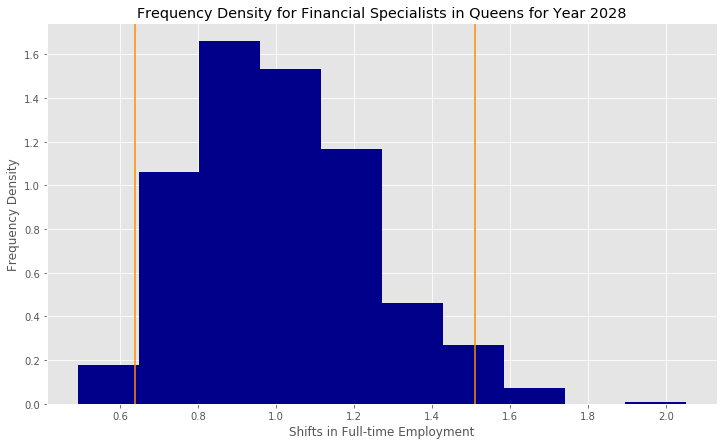

In [176]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_queens = plt.figure()
tenth_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(tenth_confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

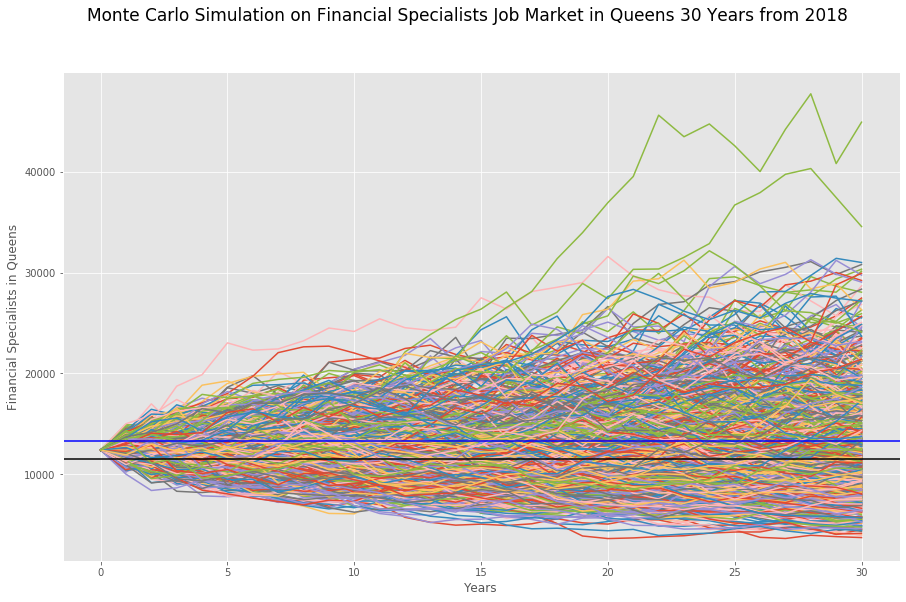

In [177]:
# Set initial employment
initial_employment_queens = 0.5*(financial_queens_male_last + financial_queens_female_last)

fig_finance_queens = plt.figure(figsize=(15,9))
fig_finance_queens.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Queens 30 Years from 2018', fontsize=17)
plt.plot(queens_employed_cumulative_moves * initial_employment_queens)
plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

In [216]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[0]
employment_gnl_upper_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f}k in financial specialists"
      f" in Queens over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_queens:,.0f}k and {employment_gnl_upper_bound_queens:,.0f}k.")

There is a 95% chance that an initial employment of 12,388k in financial specialists in Queens over the next 30 years will end within in the range of 5,389k and 25,066k.


In [179]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_queens = initial_employment_queens * tenth_confidence_interval_queens.iloc[0]
tenth_employment_gnl_upper_bound_queens = initial_employment_queens * tenth_confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f}k in financial specialists"
      f" in Queens over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_queens:,.0f}k and {tenth_employment_gnl_upper_bound_queens:,.0f}k.")

There is a 95% chance that an initial employment of 12,388k in financial specialists in Queens over the next 10 years will end within in the range of 7,912k and 18,693k.


In [180]:
employed_trajectories_queens = initial_employment_queens * queens_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_queens.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_queens

Lower 5%        Median      Upper 5%
0   12387.500000  12387.500000  12387.500000
1   11025.890315  12400.096491  13787.763440
2   10689.064956  12374.190549  14513.805465
3   10196.597771  12413.799884  15052.464014
4    9782.069102  12339.667768  15399.472714
5    9429.407447  12305.927352  15913.664839
6    9339.719797  12384.607740  16205.877825
7    8997.599674  12324.631301  16461.473892
8    8924.066516  12288.000643  17066.583426
9    8853.631286  12311.053424  17352.480223
10   8558.649295  12315.257771  17531.520803
11   8264.331757  12198.915400  17793.758530
12   8220.916561  12184.343982  18095.157282
13   8096.009562  12180.934216  18279.617121
14   8053.354017  12143.139400  18425.183469
15   7921.274475  12186.153289  19011.626154
16   7825.730941  12037.280773  19324.563764
17   7540.405003  12073.947142  19162.586872
18   7269.224826  12150.340830  19397.838697
19   7191.602529  12149.325547  19808.642682
20   7091.962114  12097.181098  20186.847423
21   7002.931724  12059.369149  20206.897668
22   6944.037679  12152.842556  20308.163815
23   6813.208044  12170.375526  21008.076548
24   6880.090911  12059.318626  21572.494740
25   6823.089754  12047.391155  22013.277740
26   6662.117235  11943.621069  22004.191348
27   6604.707522  11976.656219  22075.836035
28   6476.743915  11865.542210  22277.516349
29   6340.365047  11892.102868  22766.871173
30   6329.598535  11788.951560  22527.713761

<Figure size 432x288 with 0 Axes>

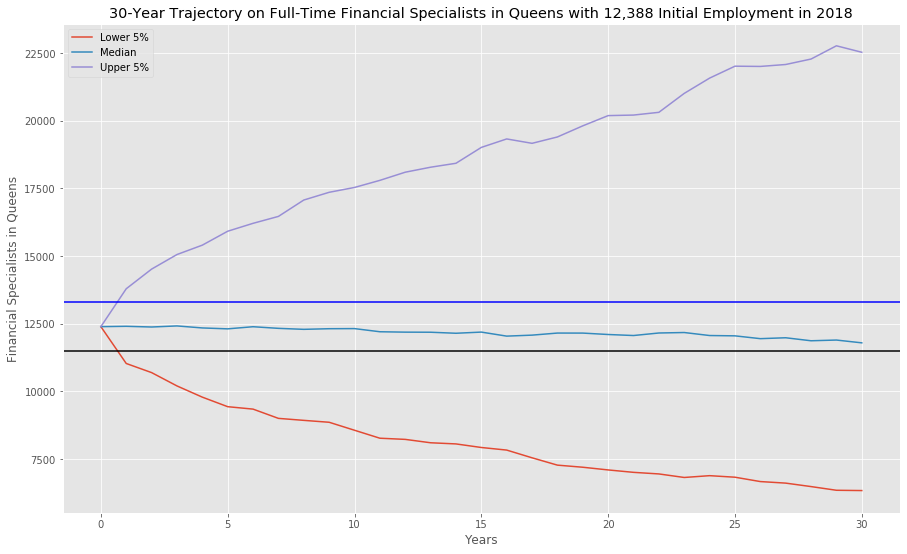

In [181]:
ax_cum_employed_queens = plt.figure()
employed_trajectories_queens.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Queens with 12,388 Initial Employment in 2018",
                          figsize=(15, 9))
plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Staten Island Over 30 Years Starting from 2018

In [182]:
df_staten = financial_specialists_Staten_Island
df_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

In [183]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_staten = df_staten.pct_change().fillna(0)
annual_moves_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                    0.000000   
       2011 Richmond County, New York                    0.229181   
       2012 Richmond County, New York                   -0.231523   
       2013 Richmond County, New York                    0.371585   
       2014 Richmond County, New York                   -0.172908   
       2015 Richmond County, New York                   -0.061015   
       2016 Richmond County, New York                    0.266758   
       2017 Richmond County, New York                   -0.116091   
       2018 Richmond County, New York                    0.020770   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                      0.000000  
       2011 Richmond County, New York                      0.017090  
       2012 Richmond County, New York                      0.521894  
       2013 Richmond County, New York                     -0.267313  
       2014 Richmond County, New York                     -0.266667  
       2015 Richmond County, New York                      0.860523  
       2016 Richmond County, New York                     -0.396921  
       2017 Richmond County, New York                      0.319645  
       2018 Richmond County, New York                      0.469722

In [184]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_staten_male = annual_moves_staten.mean()['Financial_specialists_male']
avg_annual_moves_financial_staten_female = annual_moves_staten.mean()['Financial_specialists_female']
avg_annual_moves_financial_staten_male

0.034084051475437804

In [185]:
avg_annual_moves_financial_staten_female

0.13977476125003532

In [186]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_staten_male = annual_moves_staten.std()['Financial_specialists_male']
std_dev_annual_moves_financial_staten_female = annual_moves_staten.std()['Financial_specialists_female']
std_dev_annual_moves_financial_staten_male

0.2098912804193371

In [187]:
std_dev_annual_moves_financial_staten_female

0.4272379980869996

In [188]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_staten_male_last  = df_staten['Financial_specialists_male'][-1]
financial_staten_female_last = df_staten['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_staten_employed_df = pd.DataFrame()
staten_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_staten_male = []
    simulated_financial_specialist_staten_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_staten_male = [financial_staten_male_last]
    simulated_financial_specialists_staten_female = [financial_staten_female_last]
    
            
    # Calculate the simulated price using the last price within the list
#    simulated_financial_specialist_staten_male = simulated_financial_specialists_staten_male[-1] * (1 + np.random.normal(avg_annual_moves_financial_staten_male, std_dev_annual_moves_financial_staten_male))
#    simulated_financial_specialist_staten_female = simulated_financial_specialists_staten_female[-1] * (1 + np.random.normal(avg_annual_moves_financial_staten_female, std_dev_annual_moves_financial_staten_female))

    # Append the simulated price to the list
#    simulated_financial_specialists_staten_male.append(simulated_financial_specialist_staten_male)
#    simulated_financial_specialists_staten_female.append(simulated_financial_specialist_staten_female)

    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_staten_male = simulated_financial_specialists_staten_male[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_male, std_dev_annual_moves_financial_staten_male))
        simulated_financial_specialist_staten_female = simulated_financial_specialists_staten_female[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_female, std_dev_annual_moves_financial_staten_female))

        simulated_financial_specialists_staten_male.append(simulated_financial_specialist_staten_male)
        simulated_financial_specialists_staten_female.append(simulated_financial_specialist_staten_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_staten_employed_df['Financial_specialists_male'] = simulated_financial_specialists_staten_male
    simulated_staten_employed_df['Financial_specialists_female'] = simulated_financial_specialists_staten_female
    
    # Calculate the daily returns of simulated prices
    simulated_staten_employed_moves = simulated_staten_employed_df.pct_change()
    
    # Set the portfolio weights (50% male; 50% female)
    weights = [0.5, 0.5]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    staten_employed_annual_moves = simulated_staten_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    staten_employed_cumulative_moves[n] = (1 + staten_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
staten_employed_cumulative_moves

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.905511  1.342031  1.059786  1.550061  0.907632  1.028901  1.187407   
2    1.135920  1.287330  1.281976  1.772718  0.862079  1.427319  1.125380   
3    1.055958  1.254470  1.486942  2.320959  1.078841  1.100690  1.034089   
4    0.900741  1.565856  1.800893  2.826114  1.232127  1.448404  0.909243   
5    0.708162  1.308662  1.683364  2.950013  1.601168  1.744016  0.780050   
6    0.971055  1.399345  1.958958  2.396094  1.497339  2.361618  0.780017   
7    1.170921  1.131367  2.132914  2.799102  1.418956  1.065316  0.736438   
8    1.068095  1.290934  2.335108  3.525188  1.102980  1.252583  0.910861   
9    1.428721  1.086072  2.099747  4.753409  1.368775  1.351435  1.085977   
10   1.897204  1.003642  1.467527  4.865484  1.442778  1.709818  1.148658   
11   3.442610  1.533843  1.327496  5.361243  1.400644  2.072419  0.726634   
12   2.956619  2.515709  1.502716  3.713376  2.183276  2.392814  0.887372   
13   3.257460  2.640589  1.204792  3.060391  2.040766  2.809485  1.158926   
14   3.589070  2.245051  1.236154  2.967419  1.982966  3.038329  1.064754   
15   4.917653  2.583178  0.997160  1.599102  1.581714  2.464662  0.910488   
16   5.238056  4.498379  1.132297  1.843107  1.676108  1.783142  1.286902   
17   5.523746  4.312284  1.244905  1.782693  1.097371  1.952853  1.465330   
18   6.323043  5.127642  1.272049  2.688225  1.135740  1.832468  1.641409   
19   6.588581  4.195879  1.152119  2.428596  1.044053  2.060039  2.548106   
20   6.712892  5.813244  1.188791  3.292555  0.670114  2.859074  2.526113   
21   8.431970  9.024105  0.978435  4.054167  0.740028  3.486990  2.251128   
22  10.386123  6.004424  1.150120  4.268205  0.892766  3.086640  2.300632   
23  10.895428  6.472474  1.311167  4.845929  0.551596  2.731461  3.144336   
24  15.133334  4.116964  1.900064  4.681638  0.699168  3.588421  4.624971   
25  16.969362  5.663267  2.636590  2.395245  0.677320  4.067365  5.632217   
26  15.210434  6.557046  3.444221  1.597667  0.908904  3.373772  3.127034   
27  20.604419  7.074851  3.646743  2.128863  1.080809  2.622953  3.260120   
28  33.404151  7.988449  4.245395  2.526807  0.912310  3.120917  4.834522   
29  46.254952  7.081634  4.465088  2.781049  1.128434  2.770551  5.869277   
30  44.757062  6.047696  5.385196  3.242704  1.349424  2.570616  6.665785   

         7         8         9    ...       990        991       992  \
0   1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1   0.626492  1.290198  1.104779  ...  0.764077   1.243278  1.146185   
2   0.739715  1.538968  0.749386  ...  1.076900   1.620602  1.335916   
3   0.955158  1.519106  1.123420  ...  0.987770   2.158858  1.460736   
4   0.839199  2.026971  1.214445  ...  0.992269   2.001057  1.713794   
5   0.890887  2.203863  1.818717  ...  0.923892   2.701307  1.370561   
6   1.096781  2.012229  1.861643  ...  1.245332   2.868916  1.076838   
7   1.595886  2.233264  1.278286  ...  1.078809   3.356666  0.976190   
8   1.744451  2.875567  1.731129  ...  1.371627   2.823734  0.957050   
9   2.351454  3.087253  2.160997  ...  1.382427   2.814207  0.872275   
10  2.591700  3.398447  1.812218  ...  1.492576   2.652778  1.187924   
11  2.603434  3.728085  2.261388  ...  1.392572   3.449038  1.232217   
12  3.766642  3.523464  1.899017  ...  1.692914   3.814075  1.449090   
13  3.966895  3.479234  2.164838  ...  1.873455   4.820414  1.536975   
14  4.579024  3.212890  2.021597  ...  1.558524   4.748390  1.347341   
15  5.095023  3.016038  2.156549  ...  1.748510   6.382934  1.011121   
16  5.647443  2.903519  2.494828  ...  2.138421   9.835207  1.490326   
17  3.826160  2.348020  2.000602  ...  2.287341  11.459396  1.727692   
18  3.327358  2.792078  2.419211  ...  3.548842  15.279282  1.603470   
19  4.023134  2.490782  2.114633  ...  4.129052  17.873684  1.710781   
20  4.192485  3.713370  2.515369 

<Figure size 432x288 with 0 Axes>

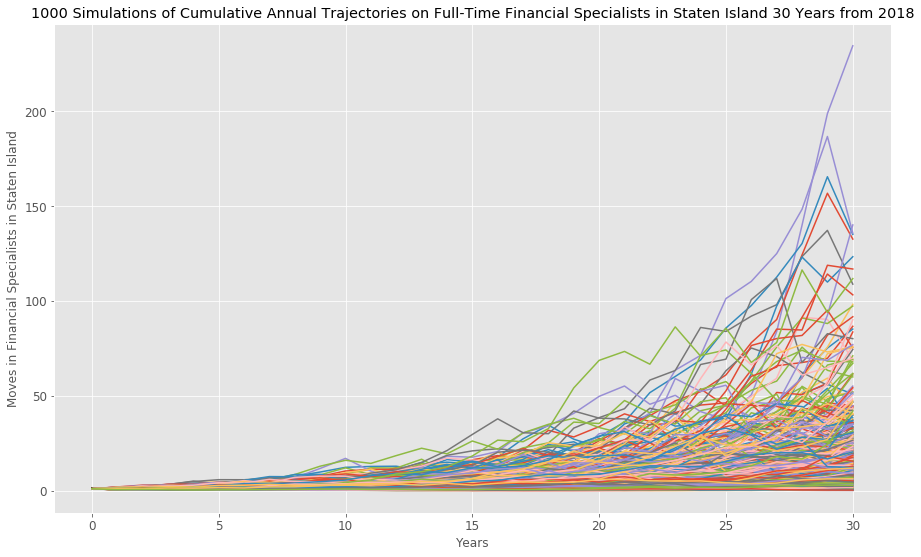

In [189]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_staten = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Staten Island 30 Years from 2018"
staten_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Staten Island')
plt.show()

In [190]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_staten.head()

0    44.757062
1     6.047696
2     5.385196
3     3.242704
4     1.349424
Name: 30, dtype: float64

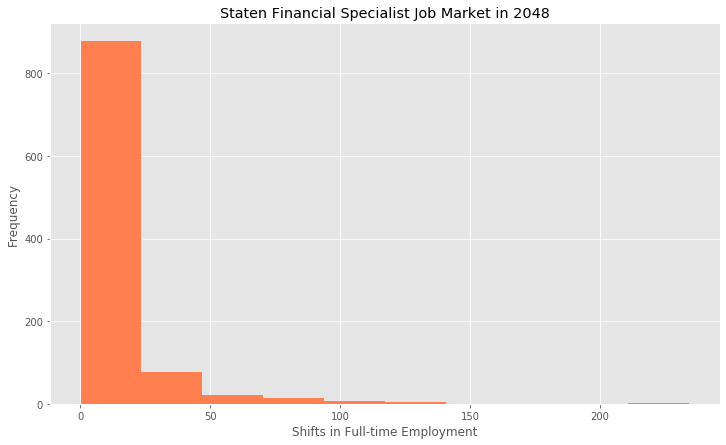

In [191]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', bins=10, color = 'coral', 
                             title='Staten Financial Specialist Job Market in 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [192]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_staten = ending_cumulative_moves_staten.quantile(q=[0.025, 0.975])
confidence_interval_staten

0.025     0.452943
0.975    69.866139
Name: 30, dtype: float64

In [193]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_staten.value_counts(bins=10) / len(ending_cumulative_moves_staten)

(-0.0844, 23.571]    0.877
(23.571, 46.991]     0.077
(46.991, 70.41]      0.021
(70.41, 93.83]       0.013
(93.83, 117.25]      0.006
(117.25, 140.67]     0.005
(210.93, 234.349]    0.001
(187.51, 210.93]     0.000
(164.09, 187.51]     0.000
(140.67, 164.09]     0.000
Name: 30, dtype: float64

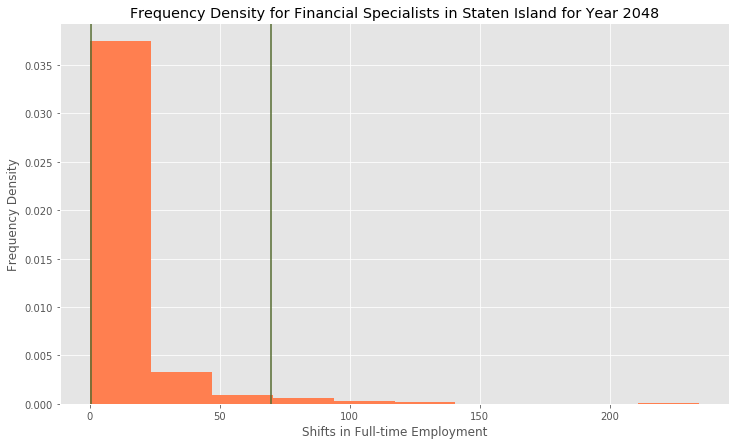

In [194]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2048', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

In [195]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_staten.head()

0    3.442610
1    1.533843
2    1.327496
3    5.361243
4    1.400644
Name: 11, dtype: float64

In [196]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_staten = tenth_cumulative_moves_staten.quantile(q=[0.025, 0.975])
tenth_confidence_interval_staten

0.025    0.392971
0.975    7.553771
Name: 11, dtype: float64

In [197]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_staten.value_counts(bins=10) / len(tenth_cumulative_moves_staten)

(0.13999999999999999, 1.576]    0.406
(1.576, 2.997]                  0.332
(2.997, 4.418]                  0.139
(4.418, 5.839]                  0.067
(5.839, 7.259]                  0.028
(7.259, 8.68]                   0.017
(10.101, 11.521]                0.004
(8.68, 10.101]                  0.004
(11.521, 12.942]                0.002
(12.942, 14.363]                0.001
Name: 11, dtype: float64

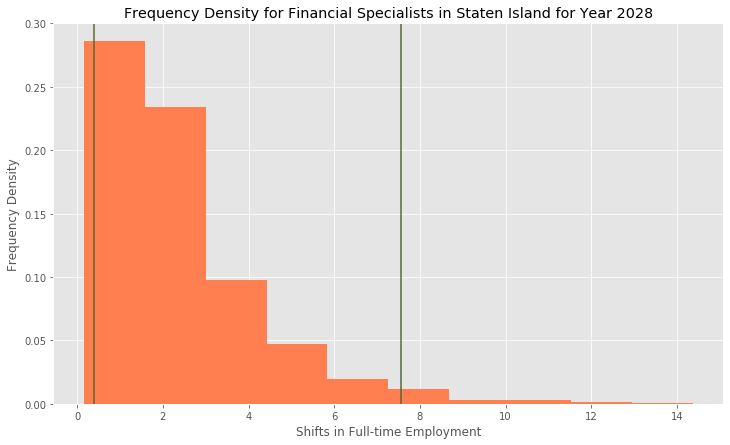

In [198]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_staten = plt.figure()
tenth_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2028', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(tenth_confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

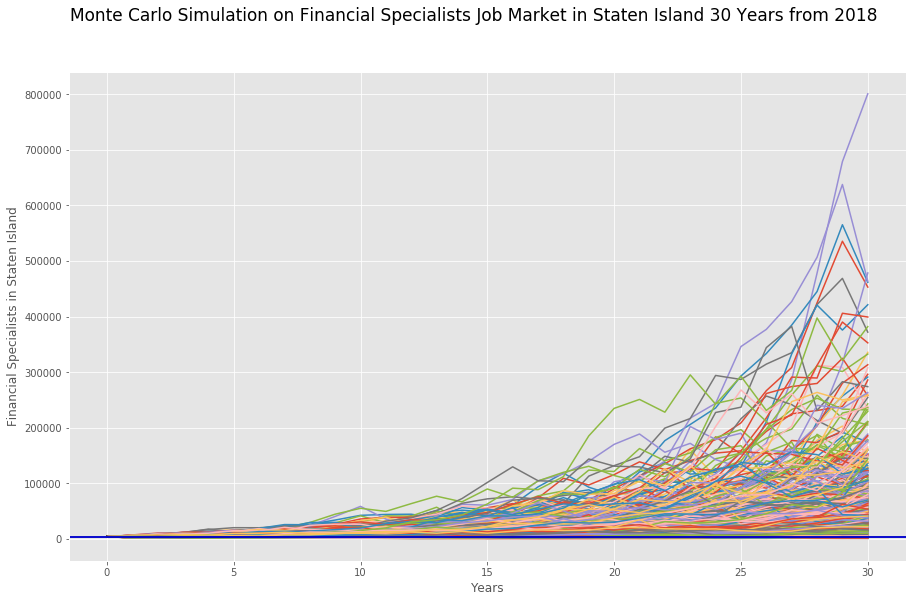

In [199]:
# Set initial employment
initial_employment_staten = 0.5*(financial_staten_male_last + financial_staten_female_last)

fig_finance_staten = plt.figure(figsize=(15,9))
fig_finance_staten.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Staten Island 30 Years from 2018', fontsize=17)
plt.plot(staten_employed_cumulative_moves * initial_employment_staten)
plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

In [200]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[0]
employment_gnl_upper_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f} in financial specialists"
      f" in Staten Island over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_staten:,.0f} and {employment_gnl_upper_bound_staten:,.0f}.")

There is a 95% chance that an initial employment of 3,418 in financial specialists in Staten Island over the next 30 years will end within in the range of 1,548 and 238,837.


In [201]:
# Calculate employment gain/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_staten = initial_employment_staten * tenth_confidence_interval_staten.iloc[0]
tenth_employment_gnl_upper_bound_staten = initial_employment_staten * tenth_confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f}k in financial specialists"
      f" in Staten Island over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_staten:,.0f}k and {tenth_employment_gnl_upper_bound_staten:,.0f}k.")

There is a 95% chance that an initial employment of 3,418k in financial specialists in Staten Island over the next 10 years will end within in the range of 1,343k and 25,823k.


In [202]:
employed_trajectories_staten = initial_employment_staten * staten_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_staten.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_staten

Lower 5%        Median       Upper 5%
0   3418.500000   3418.500000    3418.500000
1   2323.133936   3768.919113    5135.746043
2   2198.353819   3952.344891    6434.033493
3   2113.818961   4180.198260    7737.468561
4   1973.118556   4474.305690    8981.705037
5   1908.402908   4805.884442   10563.938592
6   1912.604216   5009.952321   11846.153247
7   1834.651576   5313.960568   13446.112240
8   1894.634294   5541.624245   14821.653766
9   1775.356805   5874.505567   16419.281741
10  1752.219756   6152.612663   18626.659774
11  1755.793431   6554.347815   20956.515177
12  1853.231878   7051.872099   23133.433057
13  1913.403532   7524.402603   26730.413279
14  1886.292381   7821.659418   29069.077359
15  2025.703121   8185.217395   32644.897919
16  1923.273145   8687.383314   35617.974606
17  1947.817509   8716.529357   39810.332514
18  1875.406694   9469.756294   43871.497784
19  1950.154783  10564.804529   49574.244220
20  1977.535587  11040.043786   53308.407305
21  1990.153509  11141.601230   59934.881462
22  1901.279438  11703.838297   68896.194531
23  1911.967430  12857.440645   72343.752526
24  2033.917653  13243.092909   83535.644154
25  2178.232678  14633.572513   91901.078061
26  2157.777701  14933.052097  107334.414489
27  2248.036462  16499.338244  113030.517500
28  2303.542638  17791.572260  129793.577790
29  2444.352308  18372.085825  138369.477690
30  2323.315400  19063.793625  152998.926182

<Figure size 432x288 with 0 Axes>

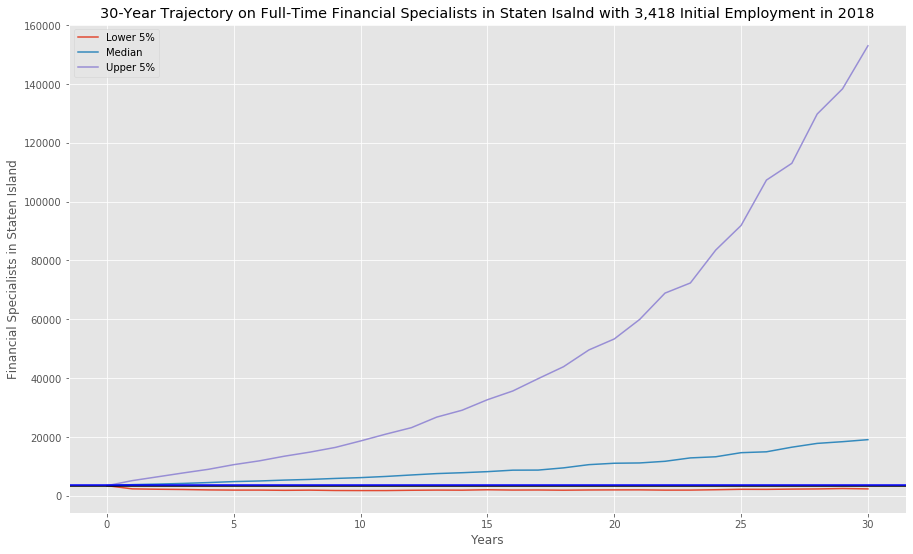

In [203]:
ax_cum_employed_staten = plt.figure()
employed_trajectories_staten.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Staten Isalnd with 3,418 Initial Employment in 2018",
                          figsize=(15, 9))
plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()